<div style=" background-color: RGB(173,40,59);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 9 CRUDER LEA</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Produisez une étude de marché avec R ou Python
</h2>

<div style="background-color: RGB(173,40,59);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies, préparation du fichier</h2>

<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">1.1 - Importation des librairies</h3>

In [1]:
# Importation des librairies 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score, silhouette_samples, adjusted_rand_score
from scipy.spatial.distance import cdist
from math import pi
from sklearn.compose import ColumnTransformer

from sklearn import datasets
from sklearn.cluster import KMeans

from matplotlib.collections import LineCollection
import plotly.express as px

In [2]:
sns.set()

<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">1.2 - Importation et préparation du fichier</h3>

In [3]:
# Importation du fichier 

data = pd.read_csv('Table_finale.csv', sep=',', index_col=0)
data

Importations_tonnes  Taux_dependance_importations  \
Pays                                                                
Afghanistan                   29000                     50.877193   
Afrique du Sud               514000                     24.268178   
Albanie                       38000                     80.851064   
Algérie                        2000                      0.722022   
Allemagne                    842000                     48.418631   
...                             ...                           ...   
Vanuatu                        4000                    133.333333   
Viet Nam                     291000                     24.129353   
Yémen                         78000                     31.707317   
Zambie                        12000                     20.000000   
Zimbabwe                       6000                      7.894737   

                Taux_auto_suffisance  Evolution_pop  Stabilite_politique  \
Pays                                                                       
Afghanistan                49.122807       2.412953                -2.80   
Afrique du Sud             78.706327       1.373032                -0.28   
Albanie                    27.659574      -0.049546                 0.38   
Algérie                    99.277978       2.027629                -0.92   
Allemagne                  87.061530       0.563777                 0.59   
...                              ...            ...                  ...   
Vanuatu                    33.333333       2.511296                 0.70   
Viet Nam                   76.119403       0.999268                 0.23   
Yémen                      68.292683       2.385013                -2.94   
Zambie                     81.666667       2.955505                 0.15   
Zimbabwe                   90.789474       1.420333                -0.71   

                Evolution_pib_nat       Pib_hab  Taux_inflation_ali  \
Pays                                                                  
Afghanistan             -2.526962   2096.100000            6.957529   
Afrique du Sud           6.063845  13950.500000            6.902628   
Albanie                 16.411324  12771.000000            3.924577   
Algérie                  2.830096  11809.500000            5.040496   
Allemagne                7.683712  53071.500000            2.762497   
...                           ...           ...                 ...   
Vanuatu                  3.937761   3031.200000            6.884776   
Viet Nam                10.219479   9050.700000           -1.072609   
Yémen                   45.020049  20336.109697            7.161697   
Zambie                   1.715712   3395.500000            5.773024   
Zimbabwe                 7.280232   2331.800000            2.534985   

                Prix_viande/Kg  Distance_to_France  
Pays                                                
Afghanistan           2.079079             5446.50  
Afrique du Sud        2.521429             8629.33  
Albanie               2.866667             1550.33  
Algérie               2.295238             2003.34  
Allemagne             1.585714              757.67  
...                        ...                 ...  
Vanuatu               2.079079            16399.05  
Viet Nam              2.816667             9772.99  
Yémen                 2.079079             5480.06  
Zambie                2.157143             7341.77  
Zimbabwe              2.261905             7862.36  

[169 rows x 10 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 169 entries, Afghanistan to Zimbabwe
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Importations_tonnes           169 non-null    int64  
 1   Taux_dependance_importations  169 non-null    float64
 2   Taux_auto_suffisance          169 non-null    float64
 3   Evolution_pop                 169 non-null    float64
 4   Stabilite_politique           169 non-null    float64
 5   Evolution_pib_nat             169 non-null    float64
 6   Pib_hab                       169 non-null    float64
 7   Taux_inflation_ali            169 non-null    float64
 8   Prix_viande/Kg                169 non-null    float64
 9   Distance_to_France            169 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 14.5+ KB


In [5]:
data.describe()

Importations_tonnes  Taux_dependance_importations  \
count         1.690000e+02                    169.000000   
mean          8.960947e+04                     45.981922   
std           1.870839e+05                     51.945473   
min           0.000000e+00                      0.000000   
25%           3.000000e+03                      4.347826   
50%           1.600000e+04                     25.230769   
75%           8.200000e+04                     80.851064   
max           1.069000e+06                    323.928571   

       Taux_auto_suffisance  Evolution_pop  Stabilite_politique  \
count            169.000000     169.000000           169.000000   
mean              77.028782       1.263538            -0.069819   
std               49.598233       1.089911             0.897973   
min                0.000000      -1.551620            -2.940000   
25%               36.065574       0.466284            -0.630000   
50%               87.671233       1.166330            -0.040000   
75%              100.000000       2.054079             0.650000   
max              304.605263       3.890497             1.600000   

       Evolution_pib_nat        Pib_hab  Taux_inflation_ali  Prix_viande/Kg  \
count         169.000000     169.000000          169.000000      169.000000   
mean            7.413297   20336.109697            4.744159        2.083700   
std             8.572436   20427.302978            6.905572        0.479536   
min           -60.381449     839.600000           -3.832744        0.897619   
25%             4.210366    4929.600000            0.722020        1.773810   
50%             7.443115   13633.000000            2.762497        2.079079   
75%            11.380224   28673.600000            6.571240        2.378571   
max            45.020049  122978.000000           38.895039        3.769048   

       Distance_to_France  
count          169.000000  
mean          5912.155621  
std           3915.695850  
min              0.000000  
25%           2868.220000  
50%           5446.500000  
75%           8455.240000  
max          19163.180000

In [6]:
# Réarrangement de l'ordre des colonnes

df = data[['Importations_tonnes', 'Distance_to_France', 'Taux_dependance_importations', 'Taux_auto_suffisance', 
          'Evolution_pib_nat', 'Stabilite_politique', 'Evolution_pop', 'Pib_hab', 'Prix_viande/Kg','Taux_inflation_ali']].copy()

In [7]:
df.shape

(169, 10)

In [8]:
# Enregistrement de l'index dans une variable (ids des lignes)

names = df.index
names

Index(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Allemagne',
       'Angola', 'Antigua-et-Barbuda', 'Arabie saoudite', 'Argentine',
       'Arménie',
       ...
       'Tunisie', 'Turkménistan', 'Turquie', 'Ukraine', 'Uruguay', 'Vanuatu',
       'Viet Nam', 'Yémen', 'Zambie', 'Zimbabwe'],
      dtype='object', name='Pays', length=169)

In [9]:
# Enregistrement des features (noms des colonnes)

features = df.columns
features

Index(['Importations_tonnes', 'Distance_to_France',
       'Taux_dependance_importations', 'Taux_auto_suffisance',
       'Evolution_pib_nat', 'Stabilite_politique', 'Evolution_pop', 'Pib_hab',
       'Prix_viande/Kg', 'Taux_inflation_ali'],
      dtype='object')

<div style="background-color: RGB(173,40,59);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Méthodes de clustering </h2>

<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">2.1 - Par Classification Hiérarchique Ascendante (CAH) </h3>

In [10]:
# Préparation des données : matrice

X = df.values 
X[:10]

array([[ 2.90000000e+04,  5.44650000e+03,  5.08771930e+01,
         4.91228070e+01, -2.52696246e+00, -2.80000000e+00,
         2.41295259e+00,  2.09610000e+03,  2.07907861e+00,
         6.95752883e+00],
       [ 5.14000000e+05,  8.62933000e+03,  2.42681775e+01,
         7.87063267e+01,  6.06384524e+00, -2.80000000e-01,
         1.37303166e+00,  1.39505000e+04,  2.52142857e+00,
         6.90262850e+00],
       [ 3.80000000e+04,  1.55033000e+03,  8.08510638e+01,
         2.76595745e+01,  1.64113245e+01,  3.80000000e-01,
        -4.95463338e-02,  1.27710000e+04,  2.86666667e+00,
         3.92457750e+00],
       [ 2.00000000e+03,  2.00334000e+03,  7.22021661e-01,
         9.92779783e+01,  2.83009561e+00, -9.20000000e-01,
         2.02762852e+00,  1.18095000e+04,  2.29523810e+00,
         5.04049583e+00],
       [ 8.42000000e+05,  7.57670000e+02,  4.84186314e+01,
         8.70615296e+01,  7.68371155e+00,  5.90000000e-01,
         5.63776881e-01,  5.30715000e+04,  1.58571429e+00,
         2.

In [11]:
# Rappel des colonnes pour les identifier par leurs indices dans la matrice

features

Index(['Importations_tonnes', 'Distance_to_France',
       'Taux_dependance_importations', 'Taux_auto_suffisance',
       'Evolution_pib_nat', 'Stabilite_politique', 'Evolution_pop', 'Pib_hab',
       'Prix_viande/Kg', 'Taux_inflation_ali'],
      dtype='object')

In [12]:
# Normalisation

# Sélection des colonnes par leurs indices pour leur attribuer plus de poids avec le robust scaler
ind_col_rbst = [0,1] # Sélection des importations et de la distance à la France (importants)
ind_col_minmax = [2,3,4,5,6,7,8,9]

# Transformateur de colonnes
transformateur_colonnes = ColumnTransformer(
    transformers=[
        ('robust', preprocessing.RobustScaler(quantile_range=(25.0, 75.0)), ind_col_rbst),
        ('minmax', preprocessing.MinMaxScaler(), ind_col_minmax)
        ])

# Appliquer normalisation

X_scaled = transformateur_colonnes.fit_transform(X)

In [13]:
pd.DataFrame(X_scaled).head()

0         1         2         3         4         5         6  \
0   0.164557  0.000000  0.157063  0.161267  0.548896  0.030837  0.728498   
1   6.303797  0.569683  0.074918  0.258388  0.630402  0.585903  0.537411   
2   0.278481 -0.697361  0.249595  0.090805  0.728574  0.731278  0.276009   
3  -0.177215 -0.616278  0.002229  0.325923  0.599722  0.444934  0.657694   
4  10.455696 -0.839236  0.149473  0.285818  0.645770  0.777533  0.388708   

          7         8         9  
0  0.010288  0.411454  0.252535  
1  0.107345  0.565506  0.251250  
2  0.097688  0.685738  0.181552  
3  0.089815  0.486733  0.207669  
4  0.427645  0.239635  0.154355

In [14]:
idx = ["mean", "std"]
pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

0     1     2     3     4     5     6     7     8     9
mean  0.93  0.08  0.14  0.25  0.64  0.63  0.52  0.16  0.41  0.20
std   2.37  0.70  0.16  0.16  0.08  0.20  0.20  0.17  0.17  0.16

In [15]:
X_scaled.shape

(169, 10)

In [16]:
# Calcul de la distance avec linkage

Z = linkage(X_scaled, method="ward")
Z[:10]

# Calcul de la matrice de similarité/dissimilarité
linkage_matrix = linkage(X_scaled, method='ward', metric='euclidean')

In [17]:
# Affichage du dendogramme

fig, ax = plt.subplots(1, 1, figsize=(10,40))

_ = dendrogram(Z, ax=ax, labels=names, orientation = 'left')

plt.title('Dendrogramme du CAH')
ax.set_xlabel('Distance')
ax.set_ylabel('Pays')
ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=15)

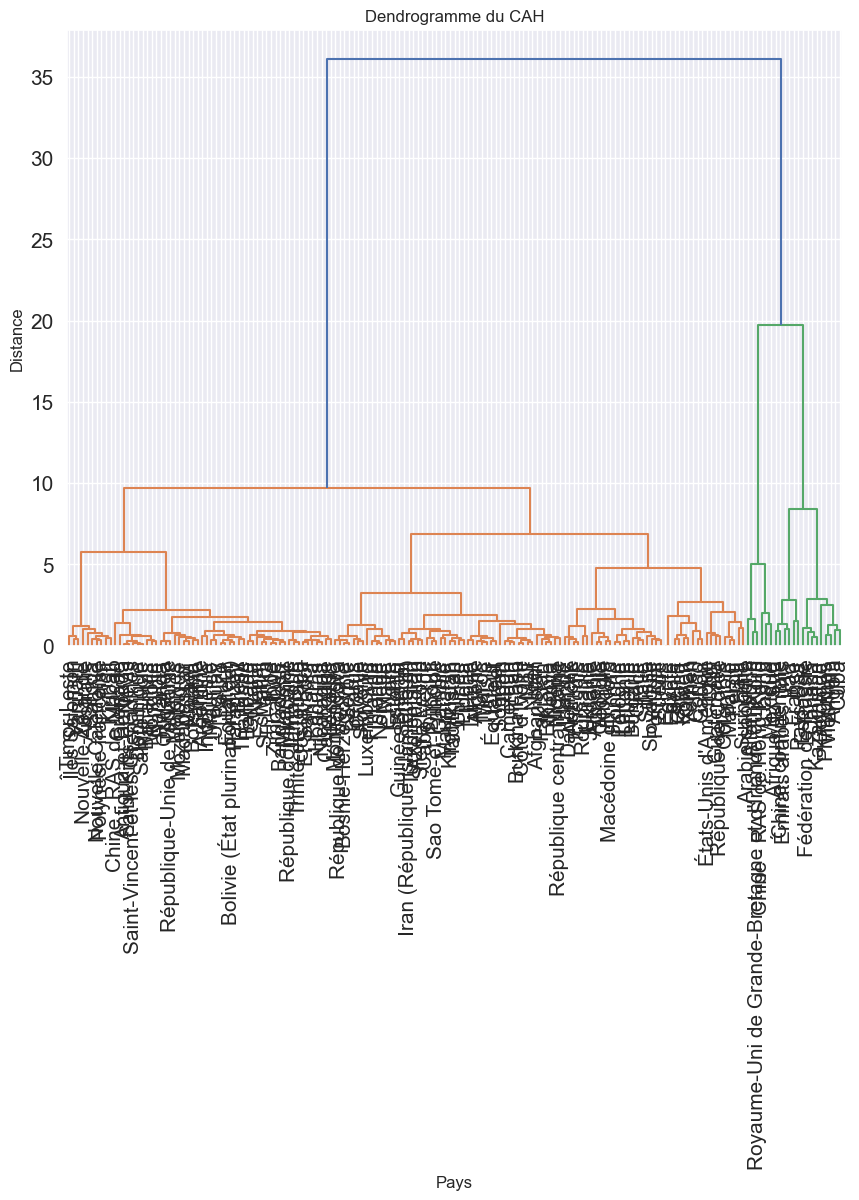

In [18]:
# Affichage du dendogramme (version verticale)

fig, ax = plt.subplots(1, 1, figsize=(10,8))

_ = dendrogram(Z, ax=ax, labels=names)

plt.title('Dendrogramme du CAH')
ax.set_xlabel('Pays')
ax.set_ylabel('Distance')
ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=15)

**On constate qu'un petit groupe se détache plus nettement que les autres (en vert), à tel point qu'on aurait pu envisager de couper les pays en 2 groupes, mais cela n'aurait pas beaucoup d'intérêt.
Nous allons étudier plus en détail le dendrogramme afin de choisir le nombre de groupes optimal et garder ce phénomène en tête pour la suite de l'analyse.**

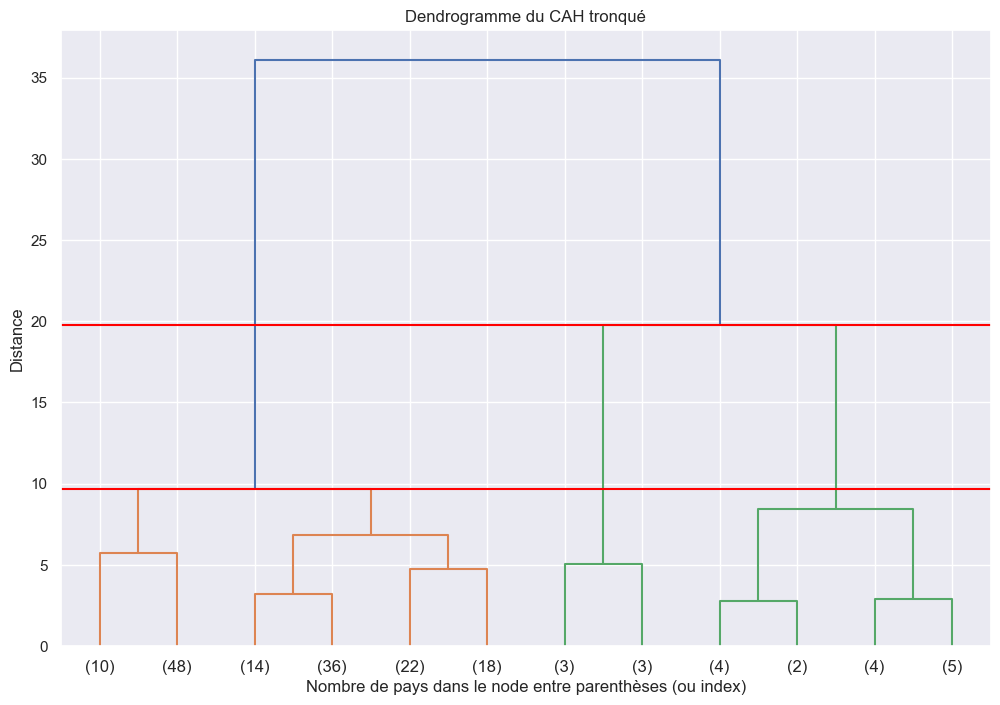

In [19]:
# Analyse du dendrogramme pour déterminer le nombre de groupes

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = dendrogram(Z, p=12, truncate_mode="lastp", ax=ax)

plt.title('Dendrogramme du CAH tronqué')
plt.xlabel('Nombre de pays dans le node entre parenthèses (ou index)')
plt.ylabel('Distance')

plt.axhline(9.7, c="red")
plt.axhline(19.8, c="red")

plt.show()

**Le plus grand saut suivant nous suggère de découper nos pays en 3 groupes (entre les lignes rouges)**

In [20]:
# Graphique du score de silhouette pour confirmer

max_clusters = 12  # Nombre maximal de clusters à considérer
silhouette_scores = []

for num_clusters in range(2, max_clusters+1):
    clusters = fcluster(linkage(X_scaled, method='ward', metric='euclidean'), num_clusters, criterion='maxclust')
    silhouette_avg = silhouette_score(X_scaled, clusters)
    silhouette_scores.append(silhouette_avg)

# Tracer le graphique du score de silhouette moyen pour chaque nombre de clusters
plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o')
plt.title("Score de silhouette moyen pour chaque nombre de clusters")
plt.xlabel("Nombre de clusters")
plt.ylabel("Score de silhouette moyen")
plt.show()

# Trouver le nombre optimal de clusters qui maximise le score de silhouette moyen
optimal_num_clusters = np.argmax(silhouette_scores) + 2  # +2 car on commence à 2 clusters
print("Nombre optimal de clusters :", optimal_num_clusters)

Nombre optimal de clusters : 2


Avec 3 groupes, on conserve un bon score de silhouette (1 étant le meilleur, et -1 le pire)

In [21]:
# Pour minimiser la perte d'infos, je choisis de prendre 3 clusters

num_clusters = 3

# Effectuer la CAH avec le nombre de clusters choisi
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Ajouter les informations de cluster dans le DataFrame initial
df['Cluster_CAH'] = clusters

# Afficher les statistiques des clusters
cluster_CAH_stats = df.groupby('Cluster_CAH').mean()
cluster_CAH_stats

Importations_tonnes  Distance_to_France  \
Cluster_CAH                                            
1                   31189.189189         5970.263446   
2                  881833.333333         5868.448333   
3                  349133.333333         5356.308000   

             Taux_dependance_importations  Taux_auto_suffisance  \
Cluster_CAH                                                       
1                               42.640235             75.536531   
2                               87.472437             64.747771   
3                               62.357022             96.664731   

             Evolution_pib_nat  Stabilite_politique  Evolution_pop  \
Cluster_CAH                                                          
1                     7.452917            -0.087498       1.309618   
2                     7.862179             0.246667       0.799041   
3                     6.842819            -0.021988       0.994680   

                  Pib_hab  Prix_viande/Kg  Taux_inflation_ali  
Cluster_CAH                                                    
1            18429.343440        2.095155            4.891316  
2            44426.366667        1.935714            2.766930  
3            29513.433980        2.029875            4.083102

### Définition des clusters grâce à l'étude des individus moyens : 

**Cluster 1 :** 

- PIB/hab le plus faible
- Pays qui importent le moins, et donc peu dépendants des importations

**-> Groupe non intéressant pour l'exportation à l'heure actuelle**

**Cluster 2 :** 

- Pays qui importent le plus
- Les plus dépendants de l'importation 
- Situation économique et politique intéressante

**-> Groupe le plus intéressant, à confirmer avec la distance à la France**


**Cluster 3:** 

- Pays auto-suffisants
- Importent tout de même, mais pas aussi dépendants que le groupe 2
- Bonne situation économique et politique

**-> Groupe pouvant devenir intéressant par la suite**

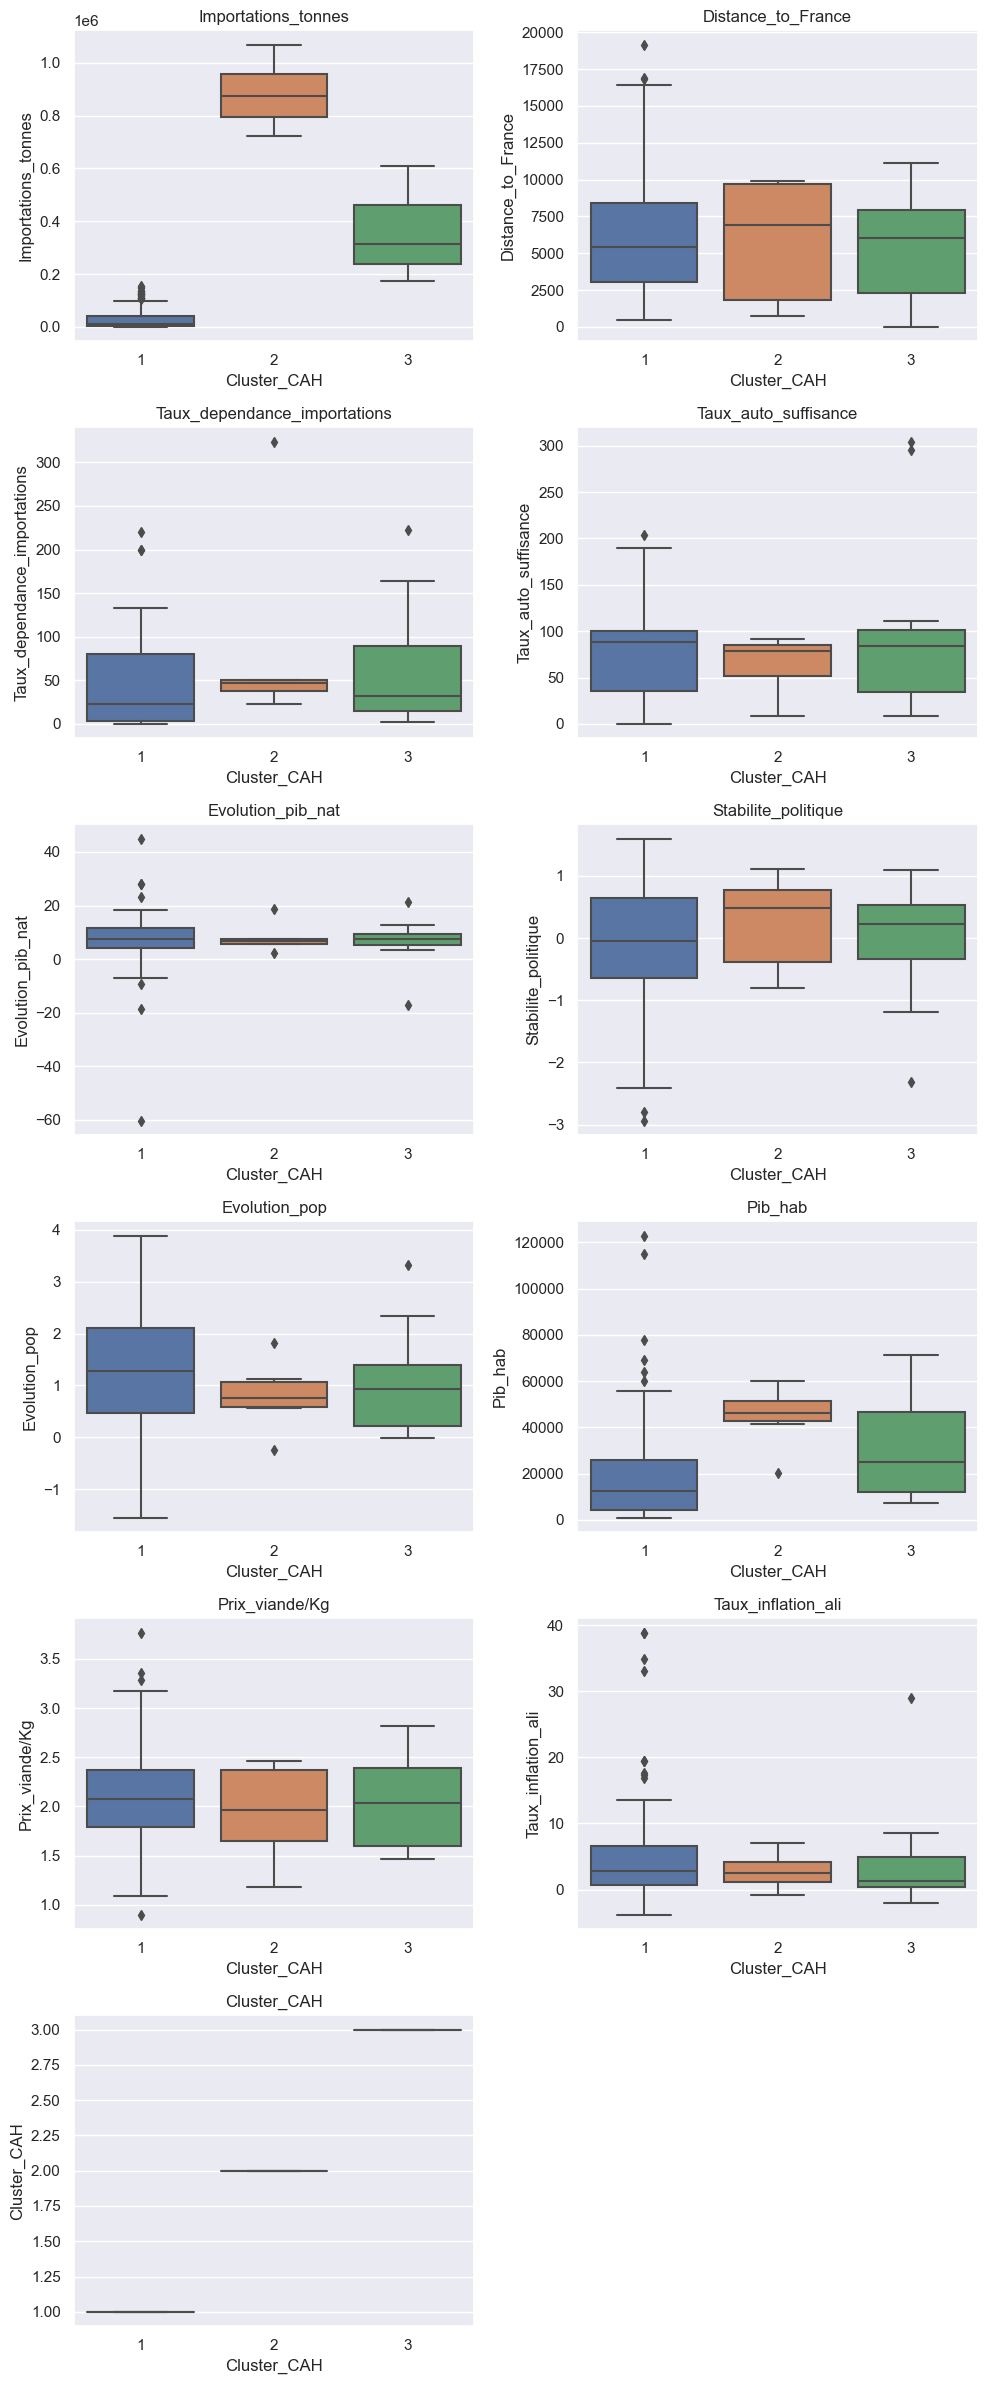

In [22]:
# Créer un boxplot pour chaque colonne numérique
num_cols = len(df.columns)

# Nombre de lignes pour les sous-graphiques
num_rows = num_cols // 2
if num_cols % 2:
    num_rows += 1

plt.figure(figsize=(10, 4 * num_rows))
for i, column in enumerate(df.columns, start=1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(x='Cluster_CAH', y=column, data=df)
    plt.title(column)

plt.tight_layout()
plt.show()

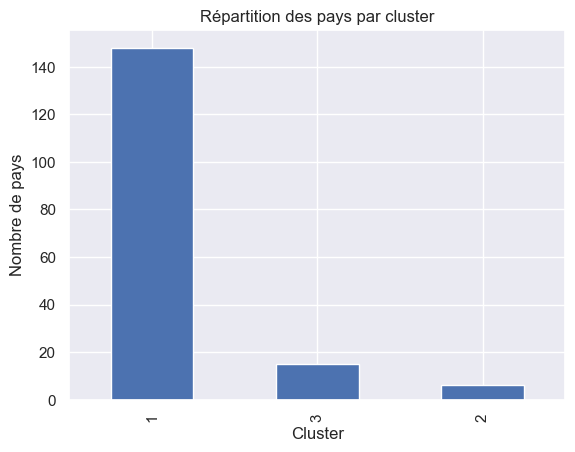

In [23]:
# Visualiser la répartition des clusters 


# Tracer le barplot
df['Cluster_CAH'].value_counts().plot(kind='bar')

# Ajouter des étiquettes et des titres
plt.xlabel('Cluster')
plt.ylabel('Nombre de pays')
plt.title('Répartition des pays par cluster')


# Afficher le graphique
plt.show()

In [24]:
# Calculer le score de silhouette

silhouette_avg = silhouette_score(X_scaled, clusters)
print("Score de silhouette :", silhouette_avg)

Score de silhouette : 0.6500202533997304


In [25]:
df_CAH1 = df.loc[df['Cluster_CAH'] == 1, :]
df_CAH1.sort_values('Distance_to_France', ascending=True)

Importations_tonnes  Distance_to_France  \
Pays                                                          
Suisse                            51000              472.36   
Luxembourg                        11000              519.85   
Autriche                         110000              876.56   
Italie                            97000              928.66   
Slovénie                          20000             1002.99   
...                                 ...                 ...   
Samoa                             17000            16370.70   
Vanuatu                            4000            16399.05   
Fidji                              3000            16834.64   
Nouvelle-Calédonie                 9000            16906.22   
Nouvelle-Zélande                   1000            19163.18   

                    Taux_dependance_importations  Taux_auto_suffisance  \
Pays                                                                     
Suisse                                 38.345865             68.421053   
Luxembourg                            100.000000              0.000000   
Autriche                               63.583815             85.549133   
Italie                                  8.269395            112.105712   
Slovénie                               38.461538            138.461538   
...                                          ...                   ...   
Samoa                                 113.333333              0.000000   
Vanuatu                               133.333333             33.333333   
Fidji                                  11.538462             88.461538   
Nouvelle-Calédonie                     81.818182              9.090909   
Nouvelle-Zélande                        0.595238            132.738095   

                    Evolution_pib_nat  Stabilite_politique  Evolution_pop  \
Pays                                                                        
Suisse                       4.409046             1.260000       0.825551   
Luxembourg                   8.047487             1.330000       2.083932   
Autriche                     9.042304             1.050000       0.810519   
Italie                       6.633524             0.310000      -0.076491   
Slovénie                    11.502132             0.870000       0.069544   
...                               ...                  ...            ...   
Samoa                        1.403113             1.180000       0.397744   
Vanuatu                      3.937761             0.700000       2.511296   
Fidji                        4.257174             0.620000       0.686528   
Nouvelle-Calédonie           7.873880            -0.069819       1.025798   
Nouvelle-Zélande             2.579254             1.600000       0.874026   

                          Pib_hab  Prix_viande/Kg  Taux_inflation_ali  \
Pays                                                                    
Suisse               69103.600000        1.607143            0.418670   
Luxembourg          114986.000000        1.561905            2.817442   
Autriche             54173.000000        1.457143            2.366326   
Italie               41581.100000        1.852381            1.880169   
Slovénie             36507.600000        1.661905            2.227840   
...                           ...             ...                 ...   
Samoa                 6238.800000        2.079079            1.375890   
Vanuatu               3031.200000        2.079079            6.884776   
Fidji                12822.000000        2.383333           -2.079975   
Nouvelle-Calédonie   20336.109697        2.079079            1.421287   
Nouvelle-Zélande     42218.500000        1.759524            2.240920   

                    Cluster_CAH  
Pays                             
Suisse                        1  
Luxembourg                    1  
Autriche                      1  
Italie                        1  
Slovénie                      1  
...                         ...  
Samoa        

In [26]:
df_CAH2 = df.loc[df['Cluster_CAH'] == 2, :]
df_CAH2.sort_values('Distance_to_France', ascending=True)

Importations_tonnes  \
Pays                                                                      
Allemagne                                                        842000   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...               779000   
Arabie saoudite                                                  722000   
Mexique                                                          972000   
Chine - RAS de Hong-Kong                                         907000   
Japon                                                           1069000   

                                                    Distance_to_France  \
Pays                                                                     
Allemagne                                                       757.67   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...              933.94   
Arabie saoudite                                                4613.21   
Mexique                                                        9199.81   
Chine - RAS de Hong-Kong                                       9817.21   
Japon                                                          9888.85   

                                                    Taux_dependance_importations  \
Pays                                                                               
Allemagne                                                              48.418631   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...                     34.870188   
Arabie saoudite                                                        50.313589   
Mexique                                                                23.038635   
Chine - RAS de Hong-Kong                                              323.928571   
Japon                                                                  44.265010   

                                                    Taux_auto_suffisance  \
Pays                                                                       
Allemagne                                                      87.061530   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...             81.199642   
Arabie saoudite                                                42.926829   
Mexique                                                        77.008770   
Chine - RAS de Hong-Kong                                        8.571429   
Japon                                                          91.718427   

                                                    Evolution_pib_nat  \
Pays                                                                    
Allemagne                                                    7.683712   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...           7.257703   
Arabie saoudite                                             18.587738   
Mexique                                                      5.478720   
Chine - RAS de Hong-Kong                                     5.995225   
Japon                                                        2.169977   

                                                    Stabilite_politique  \
Pays                                                                      
Allemagne                                                          0.59   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...                 0.39   
Arabie saoudite                                                   -0.64   
Mexique                                                           -0.80   
Chine - RAS de Hong-Kong                                           0.83   
Japon                                                              1.11   

                                                    Evolution_pop  Pib_hab  \
Pays                                                                         
Allemagne                                                0.563777  53071.5   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...       0.620770  46372.4   
Arabie saoudite                                          1.817392  45795.5   


In [27]:
df_CAH3 = df.loc[df['Cluster_CAH'] == 3, :]
df_CAH3.sort_values('Distance_to_France', ascending=True)

Importations_tonnes  Distance_to_France  \
Pays                                                            
France                             506000                0.00   
Belgique                           338000              557.26   
Pays-Bas                           608000              772.01   
Espagne                            205000              825.98   
Iraq                               470000             3829.26   
Kazakhstan                         174000             4852.85   
Émirats arabes unis                433000             5214.72   
Canada                             182000             6060.34   
Fédération de Russie               226000             6107.25   
Angola                             277000             6711.24   
Cuba                               312000             7704.66   
Chine, continentale                452000             8168.60   
Afrique du Sud                     514000             8629.33   
Viet Nam                           291000             9772.99   
Philippines                        249000            11138.13   

                      Taux_dependance_importations  Taux_auto_suffisance  \
Pays                                                                       
France                                   32.167832            111.252384   
Belgique                                222.368421            304.605263   
Pays-Bas                                163.440860            295.698925   
Espagne                                  13.694055            101.202405   
Iraq                                     83.038869             16.961131   
Kazakhstan                               52.567976             51.661631   
Émirats arabes unis                     105.097087             11.650485   
Canada                                   12.700628             98.883461   
Fédération de Russie                      4.960492             97.541703   
Angola                                   86.833856             13.166144   
Cuba                                     91.228070              8.479532   
Chine, continentale                       2.488850            100.412973   
Afrique du Sud                           24.268178             78.706327   
Viet Nam                                 24.129353             76.119403   
Philippines                              16.370809             83.629191   

                      Evolution_pib_nat  Stabilite_politique  Evolution_pop  \
Pays                                                                          
France                         7.545065             0.280000       0.228248   
Belgique                       8.062289             0.430000       0.546685   
Pays-Bas                       9.614668             0.920000       0.224500   
Espagne                        8.258730             0.280000       0.097390   
Iraq                          21.445530            -2.310000       2.345549   
Kazakhstan                     7.514241             0.030000       1.325214   
Émirats arabes unis            9.494039             0.620000       1.515262   
Canada                         4.388352             1.100000       0.932337   
Fédération de Russie           5.280742            -0.640000       0.140147   
Angola                       -17.007854            -0.380000       3.330411   
Cuba                           3.303012             0.650000      -0.009877   
Chine, continentale           12.870433            -0.069819       0.466284   
Afrique du Sud                 6.063845            -0.280000       1.373032   
Viet Nam                      10.219479             0.230000       0.999268   
Philippines                    5.589722            -1.190000       1.405751   

                           Pib_hab  Prix_viande/Kg  Taux_inflation_ali  \
Pays                                                                     
France                44577.100000        1.523810            1.088588   
Belgique              50442.300000        1.773810       

<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">2.2 - Par l'algorythme K-means </h3>

In [28]:
kmeans = KMeans()

In [29]:
# Choix du nombre optimal de clusters (méthode du coude et du score de silhouette)
inertias = []
silhouettes = []
K = range(2, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_scaled)
    inertias.append(kmeanModel.inertia_)
    silhouettes.append(silhouette_score(X_scaled, kmeanModel.labels_))

C:\Users\leacr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\leacr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\leacr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\leacr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

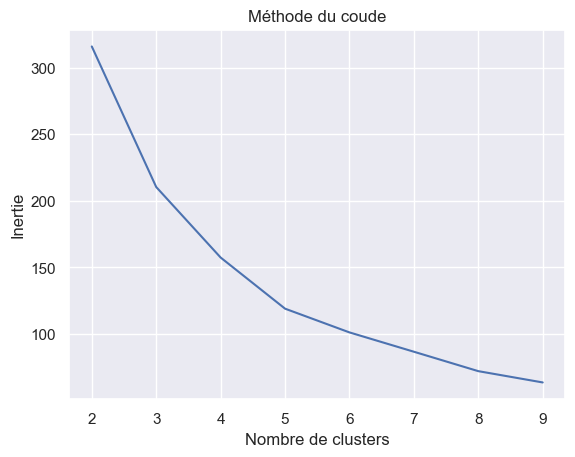

In [30]:
# Graphique de la méthode du coude

plt.plot(range(2, 10), inertias)
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du coude')
plt.show()

In [31]:
# Graphique du score de silhouette

plt.figure(figsize=(10,4))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('Score de silhouette')
plt.title('Le score de silhouette montrant le k optimal')
plt.show()

In [32]:
# Choix de 3 clusters

kmeans = KMeans(n_clusters=3)
model = kmeans.fit(X_scaled)

C:\Users\leacr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\leacr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [33]:
# Calcul de l'inertie pour comparer

print(model.inertia_)

210.3818133593081


In [34]:
# Affichage des centroïdes 

print(model.cluster_centers_)

[[ 0.23145276  0.08643101  0.13063377  0.24852823  0.6434426   0.63074417
   0.52384289  0.1471283   0.41387343  0.20328026]
 [ 4.72995781  0.04843742  0.22031418  0.32780771  0.63808261  0.61564208
   0.47752094  0.21827507  0.4286355   0.19182618]
 [10.95991561  0.07552297  0.27003619  0.21256288  0.64746355  0.70190896
   0.43193864  0.35686374  0.3615257   0.15445861]]


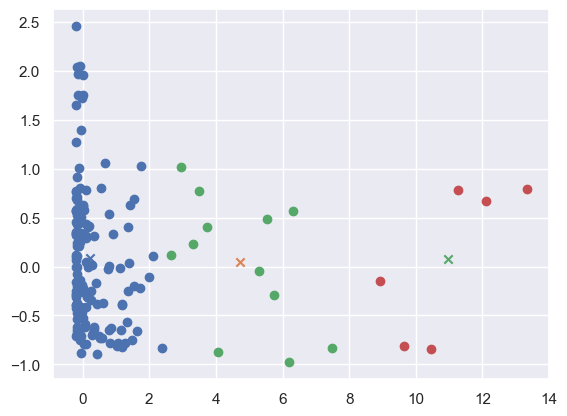

In [35]:
# Visualisation

for point in X_scaled:
    if model.predict(point.reshape(1,-1)) == [0]: 
        plt.scatter(point[0], point[1], c='b')
    elif model.predict(point.reshape(1,-1)) == [1]: 
        plt.scatter(point[0], point[1], c='g')
    elif model.predict(point.reshape(1,-1)) == [2]:
        plt.scatter(point[0], point[1], c='r')
 
for center in model.cluster_centers_:
    plt.scatter(center[0],center[1], marker='x')
    
plt.show()

In [36]:
# 2eme test

kmeans = KMeans(n_clusters=3)
model2 = kmeans.fit(X_scaled)

C:\Users\leacr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\leacr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [37]:
# Calcul de l'inertie pour comparer

print(model2.inertia_)

210.3818133593081


In [38]:
# Affichage des centroïdes 

print(model2.cluster_centers_)

[[ 0.23145276  0.08643101  0.13063377  0.24852823  0.6434426   0.63074417
   0.52384289  0.1471283   0.41387343  0.20328026]
 [10.95991561  0.07552297  0.27003619  0.21256288  0.64746355  0.70190896
   0.43193864  0.35686374  0.3615257   0.15445861]
 [ 4.72995781  0.04843742  0.22031418  0.32780771  0.63808261  0.61564208
   0.47752094  0.21827507  0.4286355   0.19182618]]


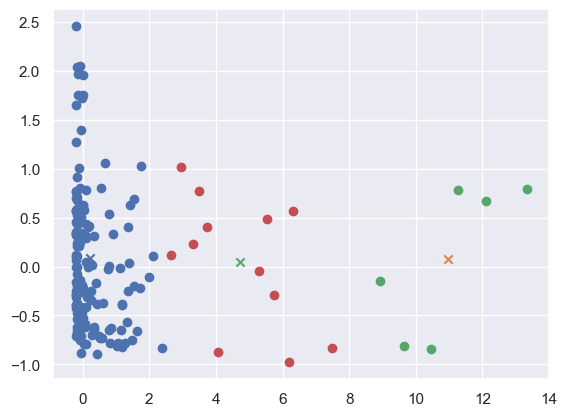

In [39]:
# Visualisation

for point in X_scaled:
    if model2.predict(point.reshape(1,-1)) == [0]: 
        plt.scatter(point[0], point[1], c='b')
    elif model2.predict(point.reshape(1,-1)) == [1]: 
        plt.scatter(point[0], point[1], c='g')
    elif model2.predict(point.reshape(1,-1)) == [2]:
        plt.scatter(point[0], point[1], c='r')

 
for center in model2.cluster_centers_:
    plt.scatter(center[0],center[1], marker='x')
    
plt.show()

In [40]:
# 3eme test

kmeans = KMeans(n_clusters=3)
model3 = kmeans.fit(X_scaled)

C:\Users\leacr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\leacr\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [41]:
# Calcul de l'inertie pour comparer

print(model3.inertia_)

210.3818133593081


In [42]:
# Affichage des centroïdes 

print(model3.cluster_centers_)

[[ 0.23145276  0.08643101  0.13063377  0.24852823  0.6434426   0.63074417
   0.52384289  0.1471283   0.41387343  0.20328026]
 [10.95991561  0.07552297  0.27003619  0.21256288  0.64746355  0.70190896
   0.43193864  0.35686374  0.3615257   0.15445861]
 [ 4.72995781  0.04843742  0.22031418  0.32780771  0.63808261  0.61564208
   0.47752094  0.21827507  0.4286355   0.19182618]]


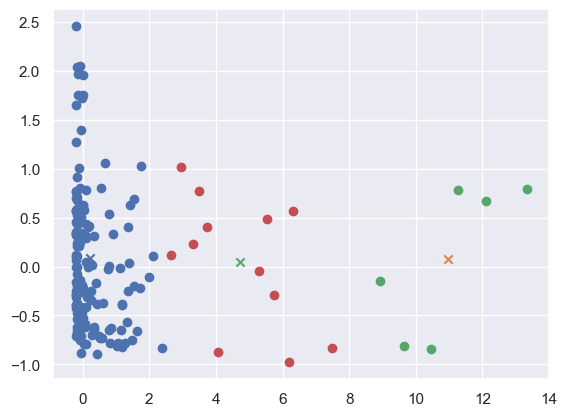

In [43]:
# Visualisation

for point in X_scaled:
    if model3.predict(point.reshape(1,-1)) == [0]: 
        plt.scatter(point[0], point[1], c='b')
    elif model3.predict(point.reshape(1,-1)) == [1]: 
        plt.scatter(point[0], point[1], c='g')
    elif model3.predict(point.reshape(1,-1)) == [2]:
        plt.scatter(point[0], point[1], c='r')

 
for center in model3.cluster_centers_:
    plt.scatter(center[0],center[1], marker='x')
    
plt.show()

In [44]:
# Ajouter les clusters au df initial 

df['Cluster_Kmeans'] = kmeans.labels_
df

Importations_tonnes  Distance_to_France  \
Pays                                                      
Afghanistan                   29000             5446.50   
Afrique du Sud               514000             8629.33   
Albanie                       38000             1550.33   
Algérie                        2000             2003.34   
Allemagne                    842000              757.67   
...                             ...                 ...   
Vanuatu                        4000            16399.05   
Viet Nam                     291000             9772.99   
Yémen                         78000             5480.06   
Zambie                        12000             7341.77   
Zimbabwe                       6000             7862.36   

                Taux_dependance_importations  Taux_auto_suffisance  \
Pays                                                                 
Afghanistan                        50.877193             49.122807   
Afrique du Sud                     24.268178             78.706327   
Albanie                            80.851064             27.659574   
Algérie                             0.722022             99.277978   
Allemagne                          48.418631             87.061530   
...                                      ...                   ...   
Vanuatu                           133.333333             33.333333   
Viet Nam                           24.129353             76.119403   
Yémen                              31.707317             68.292683   
Zambie                             20.000000             81.666667   
Zimbabwe                            7.894737             90.789474   

                Evolution_pib_nat  Stabilite_politique  Evolution_pop  \
Pays                                                                    
Afghanistan             -2.526962                -2.80       2.412953   
Afrique du Sud           6.063845                -0.28       1.373032   
Albanie                 16.411324                 0.38      -0.049546   
Algérie                  2.830096                -0.92       2.027629   
Allemagne                7.683712                 0.59       0.563777   
...                           ...                  ...            ...   
Vanuatu                  3.937761                 0.70       2.511296   
Viet Nam                10.219479                 0.23       0.999268   
Yémen                   45.020049                -2.94       2.385013   
Zambie                   1.715712                 0.15       2.955505   
Zimbabwe                 7.280232                -0.71       1.420333   

                     Pib_hab  Prix_viande/Kg  Taux_inflation_ali  Cluster_CAH  \
Pays                                                                            
Afghanistan      2096.100000        2.079079            6.957529            1   
Afrique du Sud  13950.500000        2.521429            6.902628            3   
Albanie         12771.000000        2.866667            3.924577            1   
Algérie         11809.500000        2.295238            5.040496            1   
Allemagne       53071.500000        1.585714            2.762497            2   
...                      ...             ...                 ...          ...   
Vanuatu          3031.200000        2.079079            6.884776            1   
Viet Nam         9050.700000        2.816667           -1.072609            3   
Yémen           20336.109697        2.079079            7.161697            1   
Zambie           3395.500000        2.157143            5.773024            1   
Zimbabwe         2331.800000        2.261905            2.534985            1   

                Cluster_Kmeans  
Pays                            
Afghanistan                  0  
Afrique du Sud               2  
Albanie                      0  
Algérie                      0  
Allemagne                    1  
...                        ...  
Vanuatu                      0  
Viet Nam                     2  
Yém

In [45]:
# Affichage des données moyennes des clusters
cluster_KM_stats = df.groupby('Cluster_Kmeans')[df.columns].mean()
cluster_KM_stats

Importations_tonnes  Distance_to_France  \
Cluster_Kmeans                                            
0                      34284.768212         5929.391788   
1                     881833.333333         5868.448333   
2                     389666.666667         5717.120833   

                Taux_dependance_importations  Taux_auto_suffisance  \
Cluster_Kmeans                                                       
0                                  42.316010             75.703007   
1                                  87.472437             64.747771   
2                                  71.366056             99.851955   

                Evolution_pib_nat  Stabilite_politique  Evolution_pop  \
Cluster_Kmeans                                                          
0                        7.438365            -0.076421       1.299194   
1                        7.862179             0.246667       0.799041   
2                        6.873414            -0.144985       1.047105   

                     Pib_hab  Prix_viande/Kg  Taux_inflation_ali  Cluster_CAH  \
Cluster_Kmeans                                                                  
0               18809.615424        2.086027            4.852971     1.039735   
1               44426.366667        1.935714            2.766930     2.000000   
2               27499.367475        2.128415            4.363563     3.000000   

                Cluster_Kmeans  
Cluster_Kmeans                  
0                          0.0  
1                          1.0  
2                          2.0

### Définition des clusters grâce à l'étude des individus moyens : 

**Cluster 0 :** 

- PIB/hab le plus faible
- Pays qui importent le moins, et donc peu dépendants des importations

**-> Groupe non intéressant pour l'exportation à l'heure actuelle**

**Cluster 1 :** 

- Pays qui importent le plus
- Les plus dépendants de l'importation 
- Situation économique et politique intéressante

**-> Groupe le plus intéressant, à confirmer avec la distance à la France**


**Cluster 2:** 

- Pays auto-suffisants
- Importent tout de même, mais pas aussi dépendants que le groupe 2
- Bonne situation économique et politique

**-> Groupe pouvant devenir intéressant par la suite mais choix peu fiable sur la durée**

On retrouve les mêmes particularités pour les groupes qu'avec l'ACH

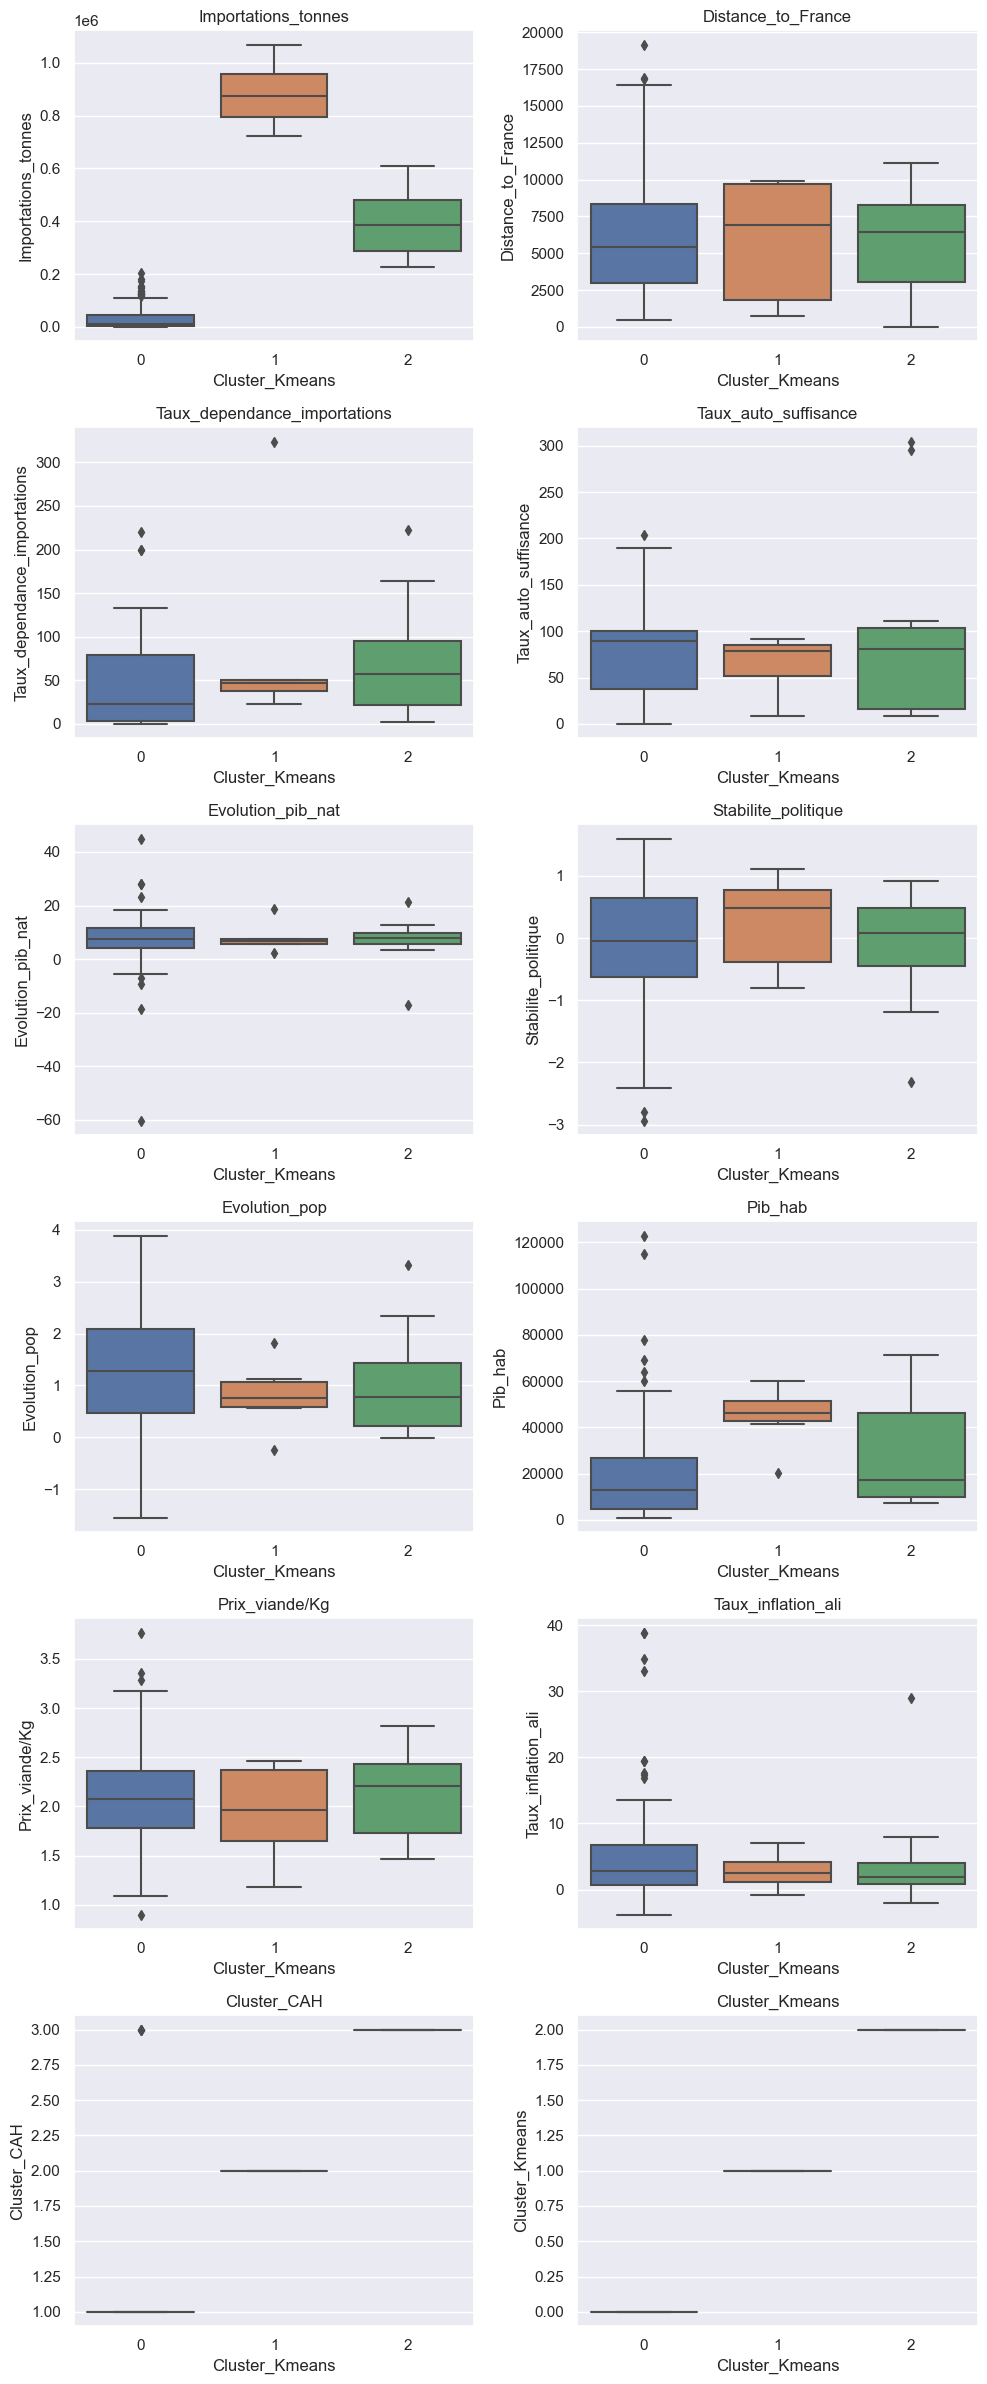

In [46]:
# Créer un boxplot pour chaque colonne 
num_cols = len(df.columns)

# Nombre de lignes pour les sous-graphiques
num_rows = num_cols // 2
if num_cols % 2:
    num_rows += 1

plt.figure(figsize=(10, 4 * num_rows))
for i, column in enumerate(df.columns, start=1):
    plt.subplot(num_rows, 2, i)
    sns.boxplot(x='Cluster_Kmeans', y=column, data=df)
    plt.title(column)

plt.tight_layout()
plt.show()

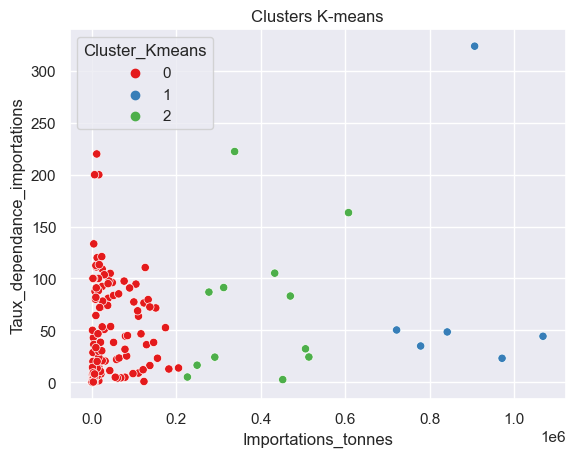

In [47]:
# Visualisation des groupes sur l'importation et le TDI

sns.scatterplot(data=df, x='Importations_tonnes', y='Taux_dependance_importations', hue='Cluster_Kmeans', palette='Set1')
plt.title("Clusters K-means")
plt.show()

In [48]:
df_Kmean0 = df.loc[df['Cluster_Kmeans'] == 0, :]
df_Kmean0.sort_values('Distance_to_France', ascending=True)

Importations_tonnes  Distance_to_France  \
Pays                                                          
Suisse                            51000              472.36   
Luxembourg                        11000              519.85   
Espagne                          205000              825.98   
Autriche                         110000              876.56   
Italie                            97000              928.66   
...                                 ...                 ...   
Samoa                             17000            16370.70   
Vanuatu                            4000            16399.05   
Fidji                              3000            16834.64   
Nouvelle-Calédonie                 9000            16906.22   
Nouvelle-Zélande                   1000            19163.18   

                    Taux_dependance_importations  Taux_auto_suffisance  \
Pays                                                                     
Suisse                                 38.345865             68.421053   
Luxembourg                            100.000000              0.000000   
Espagne                                13.694055            101.202405   
Autriche                               63.583815             85.549133   
Italie                                  8.269395            112.105712   
...                                          ...                   ...   
Samoa                                 113.333333              0.000000   
Vanuatu                               133.333333             33.333333   
Fidji                                  11.538462             88.461538   
Nouvelle-Calédonie                     81.818182              9.090909   
Nouvelle-Zélande                        0.595238            132.738095   

                    Evolution_pib_nat  Stabilite_politique  Evolution_pop  \
Pays                                                                        
Suisse                       4.409046             1.260000       0.825551   
Luxembourg                   8.047487             1.330000       2.083932   
Espagne                      8.258730             0.280000       0.097390   
Autriche                     9.042304             1.050000       0.810519   
Italie                       6.633524             0.310000      -0.076491   
...                               ...                  ...            ...   
Samoa                        1.403113             1.180000       0.397744   
Vanuatu                      3.937761             0.700000       2.511296   
Fidji                        4.257174             0.620000       0.686528   
Nouvelle-Calédonie           7.873880            -0.069819       1.025798   
Nouvelle-Zélande             2.579254             1.600000       0.874026   

                          Pib_hab  Prix_viande/Kg  Taux_inflation_ali  \
Pays                                                                    
Suisse               69103.600000        1.607143            0.418670   
Luxembourg          114986.000000        1.561905            2.817442   
Espagne              39528.900000        1.483333            1.231592   
Autriche             54173.000000        1.457143            2.366326   
Italie               41581.100000        1.852381            1.880169   
...                           ...             ...                 ...   
Samoa                 6238.800000        2.079079            1.375890   
Vanuatu               3031.200000        2.079079            6.884776   
Fidji                12822.000000        2.383333           -2.079975   
Nouvelle-Calédonie   20336.109697        2.079079            1.421287   
Nouvelle-Zélande     42218.500000        1.759524            2.240920   

                    Cluster_CAH  Cluster_Kmeans  
Pays                                             
Suisse                        1               0  
Luxembourg                    1               0  
Espagne                       3               0  
Autriche                      1    

In [49]:
df_Kmean1 = df.loc[df['Cluster_Kmeans'] == 1, :]
df_Kmean1.sort_values('Distance_to_France', ascending=True)

Importations_tonnes  \
Pays                                                                      
Allemagne                                                        842000   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...               779000   
Arabie saoudite                                                  722000   
Mexique                                                          972000   
Chine - RAS de Hong-Kong                                         907000   
Japon                                                           1069000   

                                                    Distance_to_France  \
Pays                                                                     
Allemagne                                                       757.67   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...              933.94   
Arabie saoudite                                                4613.21   
Mexique                                                        9199.81   
Chine - RAS de Hong-Kong                                       9817.21   
Japon                                                          9888.85   

                                                    Taux_dependance_importations  \
Pays                                                                               
Allemagne                                                              48.418631   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...                     34.870188   
Arabie saoudite                                                        50.313589   
Mexique                                                                23.038635   
Chine - RAS de Hong-Kong                                              323.928571   
Japon                                                                  44.265010   

                                                    Taux_auto_suffisance  \
Pays                                                                       
Allemagne                                                      87.061530   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...             81.199642   
Arabie saoudite                                                42.926829   
Mexique                                                        77.008770   
Chine - RAS de Hong-Kong                                        8.571429   
Japon                                                          91.718427   

                                                    Evolution_pib_nat  \
Pays                                                                    
Allemagne                                                    7.683712   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...           7.257703   
Arabie saoudite                                             18.587738   
Mexique                                                      5.478720   
Chine - RAS de Hong-Kong                                     5.995225   
Japon                                                        2.169977   

                                                    Stabilite_politique  \
Pays                                                                      
Allemagne                                                          0.59   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...                 0.39   
Arabie saoudite                                                   -0.64   
Mexique                                                           -0.80   
Chine - RAS de Hong-Kong                                           0.83   
Japon                                                              1.11   

                                                    Evolution_pop  Pib_hab  \
Pays                                                                         
Allemagne                                                0.563777  53071.5   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...       0.620770  46372.4   
Arabie saoudite                                          1.817392  45795.5   


**-> Pays à cibler confirmés par les 2 méthodes de clustering**

In [50]:
df_Kmean1.describe()

Importations_tonnes  Distance_to_France  Taux_dependance_importations  \
count         6.000000e+00            6.000000                      6.000000   
mean          8.818333e+05         5868.448333                     87.472437   
std           1.276737e+05         4356.589716                    116.278181   
min           7.220000e+05          757.670000                     23.038635   
25%           7.947500e+05         1853.757500                     37.218894   
50%           8.745000e+05         6906.510000                     46.341821   
75%           9.557500e+05         9662.860000                     49.839849   
max           1.069000e+06         9888.850000                    323.928571   

       Taux_auto_suffisance  Evolution_pib_nat  Stabilite_politique  \
count              6.000000           6.000000             6.000000   
mean              64.747771           7.862179             0.246667   
std               32.490772           5.603614             0.788129   
min                8.571429           2.169977            -0.800000   
25%               51.447314           5.607846            -0.382500   
50%               79.104206           6.626464             0.490000   
75%               85.596058           7.577210             0.770000   
max               91.718427          18.587738             1.110000   

       Evolution_pop       Pib_hab  Prix_viande/Kg  Taux_inflation_ali  \
count       6.000000      6.000000        6.000000            6.000000   
mean        0.799041  44426.366667        1.935714            2.766930   
std         0.680516  13579.445845        0.507785            2.790042   
min        -0.235707  20032.400000        1.176190           -0.821562   
25%         0.578025  42532.025000        1.645238            1.088985   
50%         0.757997  46083.950000        1.967857            2.511824   
75%         1.073398  51396.725000        2.369048            4.241579   
max         1.817392  59842.200000        2.461905            6.966624   

       Cluster_CAH  Cluster_Kmeans  
count          6.0             6.0  
mean           2.0             1.0  
std            0.0             0.0  
min            2.0             1.0  
25%            2.0             1.0  
50%            2.0             1.0  
75%            2.0             1.0  
max            2.0             1.0

In [51]:
df_Kmean2 = df.loc[df['Cluster_Kmeans'] == 2, :]
df_Kmean2.sort_values('Distance_to_France', ascending=True)

Importations_tonnes  Distance_to_France  \
Pays                                                            
France                             506000                0.00   
Belgique                           338000              557.26   
Pays-Bas                           608000              772.01   
Iraq                               470000             3829.26   
Émirats arabes unis                433000             5214.72   
Fédération de Russie               226000             6107.25   
Angola                             277000             6711.24   
Cuba                               312000             7704.66   
Chine, continentale                452000             8168.60   
Afrique du Sud                     514000             8629.33   
Viet Nam                           291000             9772.99   
Philippines                        249000            11138.13   

                      Taux_dependance_importations  Taux_auto_suffisance  \
Pays                                                                       
France                                   32.167832            111.252384   
Belgique                                222.368421            304.605263   
Pays-Bas                                163.440860            295.698925   
Iraq                                     83.038869             16.961131   
Émirats arabes unis                     105.097087             11.650485   
Fédération de Russie                      4.960492             97.541703   
Angola                                   86.833856             13.166144   
Cuba                                     91.228070              8.479532   
Chine, continentale                       2.488850            100.412973   
Afrique du Sud                           24.268178             78.706327   
Viet Nam                                 24.129353             76.119403   
Philippines                              16.370809             83.629191   

                      Evolution_pib_nat  Stabilite_politique  Evolution_pop  \
Pays                                                                          
France                         7.545065             0.280000       0.228248   
Belgique                       8.062289             0.430000       0.546685   
Pays-Bas                       9.614668             0.920000       0.224500   
Iraq                          21.445530            -2.310000       2.345549   
Émirats arabes unis            9.494039             0.620000       1.515262   
Fédération de Russie           5.280742            -0.640000       0.140147   
Angola                       -17.007854            -0.380000       3.330411   
Cuba                           3.303012             0.650000      -0.009877   
Chine, continentale           12.870433            -0.069819       0.466284   
Afrique du Sud                 6.063845            -0.280000       1.373032   
Viet Nam                      10.219479             0.230000       0.999268   
Philippines                    5.589722            -1.190000       1.405751   

                           Pib_hab  Prix_viande/Kg  Taux_inflation_ali  \
Pays                                                                     
France                44577.100000        1.523810            1.088588   
Belgique              50442.300000        1.773810            1.266698   
Pays-Bas              55088.600000        1.461905            2.664325   
Iraq                   9976.900000        2.378571           -2.057420   
Émirats arabes unis   71182.400000        2.038095            1.212139   
Fédération de Russie  25926.400000        2.333333            2.704276   
Angola                 7216.100000        2.407143           28.911962   
Cuba                  20336.109697        2.079079            7.884947   
Chine, continentale   14243.500000        1.600000           -0.193079   
Afrique du Sud        13950.500000        2.521429            6.902628   
Viet Nam               9050.700000        2.816667 

<div style="background-color: RGB(173,40,59);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Analyse en Composantes Principales (ACP)</h2>

<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">3.1 - Recherche et analyse des dimensions </h3>

In [52]:
# Vérification

X.shape

(169, 10)

In [53]:
# Normalisation

# Sélection des colonnes pour attribuer plus de poids 
ind_col_rbst= [0] # la colonne 0 correspond aux importations
ind_col_std = [1,2,3,4,5,6,7,8,9]

# Transformateur de colonnes
transformateur_colonnes = ColumnTransformer(
    transformers=[
        ('rbst', preprocessing.RobustScaler(unit_variance= True), ind_col_rbst),
        ('std', preprocessing.StandardScaler(), ind_col_std)
        ])

# Appliquer normalisation

X_scaled = transformateur_colonnes.fit_transform(X)

In [54]:
# Verif moyenne à 0 et std (ecart-type) à 1 pour les variables sélectionnées

idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

0    1    2    3    4    5    6    7    8    9
mean  1.26  0.0  0.0  0.0 -0.0  0.0  0.0 -0.0 -0.0 -0.0
std   3.19  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [55]:
# On choisit de travailler sur 4 composantes max

n_components = 4

In [56]:
# Instance de l'ACP

pca = PCA(n_components=n_components)

In [57]:
# Entrainement de l'ACP sur les données scalées

pca.fit(X_scaled)

PCA(n_components=4)

In [58]:
# Vérification des composantes par la variance expliquée

pca.explained_variance_ratio_

array([0.54286423, 0.12118906, 0.08672016, 0.06436728])

In [59]:
# Enregistrement dans une variable

scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([54.29, 12.12,  8.67,  6.44])

In [60]:
# Somme cumulée 

scree_cum = scree.cumsum().round()
scree_cum

array([54., 66., 75., 82.])

In [61]:
# Préparation pour l'éboulis des valeurs propres

x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4]

In [62]:
# Les composantes : calcul du nombre 

pcs = pca.components_
pcs

array([[ 0.9854039 , -0.02820646,  0.07981015,  0.01629148,  0.02501466,
         0.04347014, -0.05806679,  0.11641046, -0.03624833, -0.02821354],
       [ 0.1426843 ,  0.15875176, -0.11228723, -0.11162905, -0.07959579,
        -0.50402999,  0.38970782, -0.45891498,  0.41711322,  0.36404574],
       [-0.02482309,  0.34234121,  0.57605308, -0.64689292,  0.01098671,
         0.24983526,  0.20528776, -0.01369892,  0.08171721, -0.14259004],
       [ 0.03189898,  0.58504596, -0.19781734,  0.1731808 , -0.71689477,
         0.2292007 , -0.13942532, -0.01226496,  0.03363742, -0.01969737]])

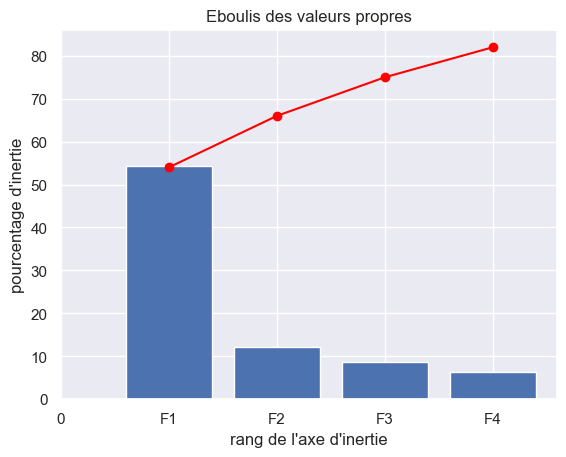

In [63]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.xticks(np.arange(5), [0,'F1', 'F2', 'F3','F4'])
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [64]:
# Matrice des corrélations

pcs = pd.DataFrame(pcs)
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

Importations_tonnes  Distance_to_France  Taux_dependance_importations  \
F1                 0.99               -0.03                          0.08   
F2                 0.14                0.16                         -0.11   
F3                -0.02                0.34                          0.58   
F4                 0.03                0.59                         -0.20   

    Taux_auto_suffisance  Evolution_pib_nat  Stabilite_politique  \
F1                  0.02               0.03                 0.04   
F2                 -0.11              -0.08                -0.50   
F3                 -0.65               0.01                 0.25   
F4                  0.17              -0.72                 0.23   

    Evolution_pop  Pib_hab  Prix_viande/Kg  Taux_inflation_ali  
F1          -0.06     0.12           -0.04               -0.03  
F2           0.39    -0.46            0.42                0.36  
F3           0.21    -0.01            0.08               -0.14  
F4          -0.14    -0.01            0.03               -0.02

<Axes: >

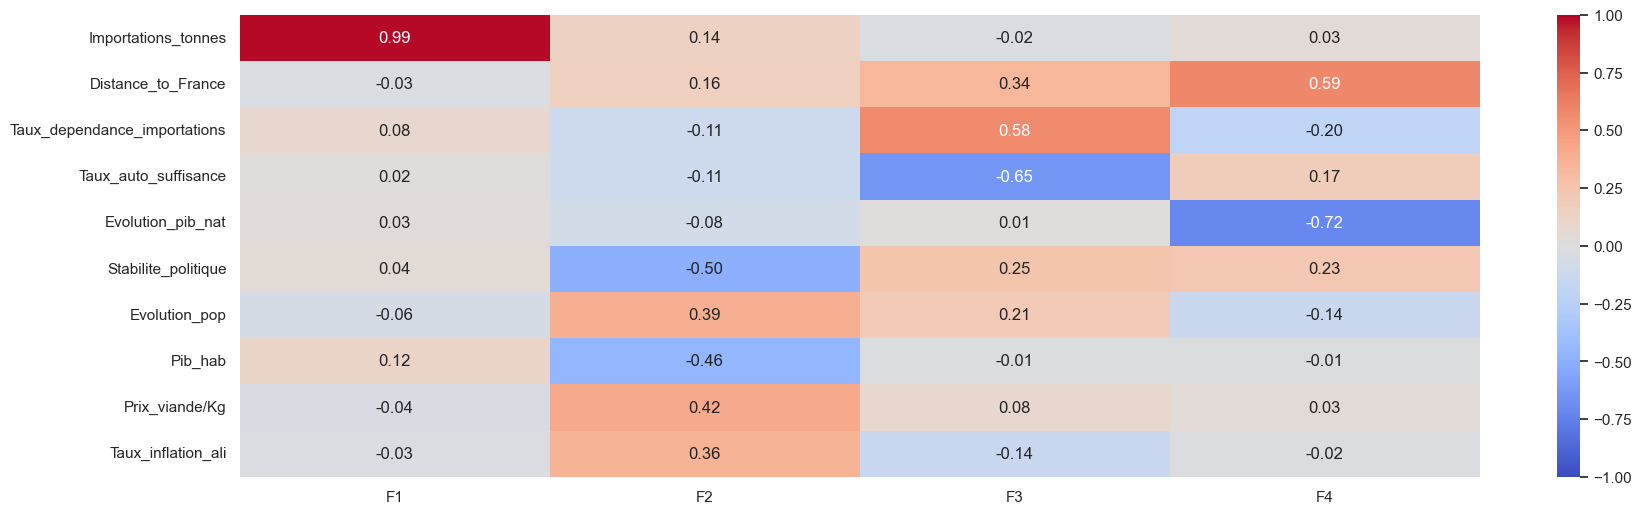

In [65]:
# Représentation visuelle 

fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

In [66]:
# Choix du nombre d'axes 

# Analyse des valeurs propres

comp = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(4)], 
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
comp

Dimension  Valeur propre  % variance expliquée  % cum. var. expliquée
0      Dim1      10.454999                  54.0                   54.0
1      Dim2       2.333975                  12.0                   66.0
2      Dim3       1.670140                   9.0                   75.0
3      Dim4       1.239647                   6.0                   82.0

In [67]:
# Calcul du cosinus carré des variables
cos_squared = np.square(pca.components_)
feature_names=df.columns[0:10]

# Création d'un dataframe pandas avec le cosinus carré des variables
df_cos_squared = pd.DataFrame(cos_squared, columns=feature_names)
df_cos_squared.index = ['F{}'.format(i+1) for i in range(4)]

print(df_cos_squared)

    Importations_tonnes  Distance_to_France  Taux_dependance_importations  \
F1             0.971021            0.000796                      0.006370   
F2             0.020359            0.025202                      0.012608   
F3             0.000616            0.117198                      0.331837   
F4             0.001018            0.342279                      0.039132   

    Taux_auto_suffisance  Evolution_pib_nat  Stabilite_politique  \
F1              0.000265           0.000626             0.001890   
F2              0.012461           0.006335             0.254046   
F3              0.418470           0.000121             0.062418   
F4              0.029992           0.513938             0.052533   

    Evolution_pop   Pib_hab  Prix_viande/Kg  Taux_inflation_ali  
F1       0.003372  0.013551        0.001314            0.000796  
F2       0.151872  0.210603        0.173983            0.132529  
F3       0.042143  0.000188        0.006678            0.020332  
F4       

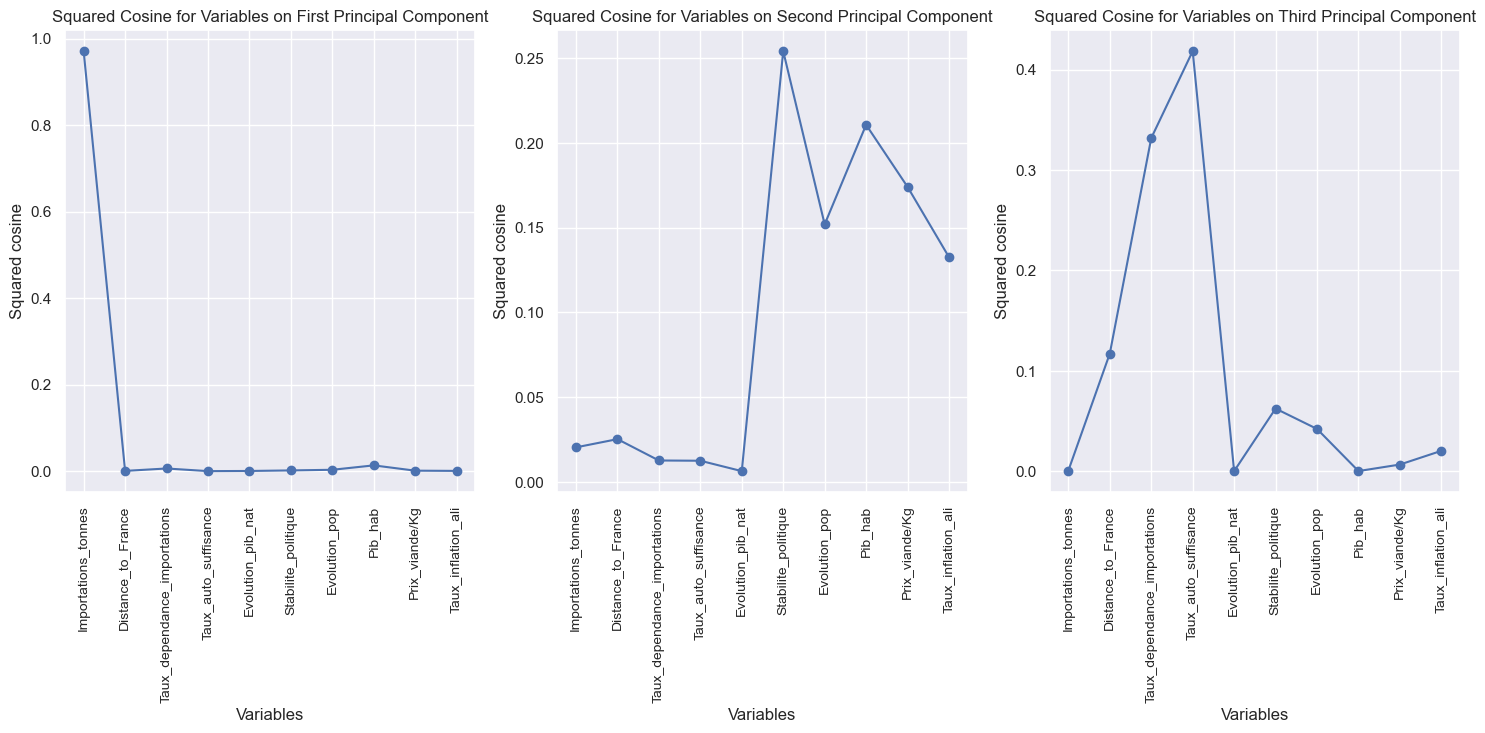

In [68]:
# Calculer les carrés des cosinus des variables sur les axes principaux
cos2 = pca.components_ ** 2
row_sums = cos2.sum(axis=1)
cos2 = cos2 / row_sums[:, np.newaxis]

# Afficher les graphiques des carrés des cosinus des variables sur les axes principaux pour le premier, le deuxième et le troisième axe principal
n_comp = pca.n_components_
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].plot(range(1, len(features)+1), cos2[0,:], '-o')
axs[0].set_xticks(range(1, len(features)+1))
axs[0].set_xticklabels(features, rotation=90, fontsize=10)
axs[0].set_xlabel("Variables")
axs[0].set_ylabel("Squared cosine")
axs[0].set_title("Squared Cosine for Variables on First Principal Component")
axs[1].plot(range(1, len(features)+1), cos2[1,:], '-o')
axs[1].set_xticks(range(1, len(features)+1))
axs[1].set_xticklabels(features, rotation=90, fontsize=10)
axs[1].set_xlabel("Variables")
axs[1].set_ylabel("Squared cosine")
axs[1].set_title("Squared Cosine for Variables on Second Principal Component")
axs[2].plot(range(1, len(features)+1), cos2[2,:], '-o')
axs[2].set_xticks(range(1, len(features)+1))
axs[2].set_xticklabels(features, rotation=90, fontsize=10)
axs[2].set_xlabel("Variables")
axs[2].set_ylabel("Squared cosine")
axs[2].set_title("Squared Cosine for Variables on Third Principal Component")
plt.show()

In [69]:
# Calculer la contribution des variables à la formation des axes

feature_names=features
loadings = pca.components_.T
eigenvalues = pca.explained_variance_
variable_contributions = (loadings**2) * eigenvalues

# Convertir les contributions en pourcentage
variable_contrib_percent = variable_contributions / eigenvalues * 100

# Créer un DataFrame pour faciliter l'affichage des résultats
column_names = [f'F{i+1}_contrib' for i in range(4)]
variable_contrib_df = pd.DataFrame(variable_contrib_percent, columns=column_names, index=feature_names)

print(variable_contrib_df)

                              F1_contrib  F2_contrib  F3_contrib  F4_contrib
Importations_tonnes            97.102084    2.035881    0.061619    0.101755
Distance_to_France              0.079560    2.520212   11.719750   34.227878
Taux_dependance_importations    0.636966    1.260842   33.183715    3.913170
Taux_auto_suffisance            0.026541    1.246104   41.847045    2.999159
Evolution_pib_nat               0.062573    0.633549    0.012071   51.393811
Stabilite_politique             0.188965   25.404623    6.241766    5.253296
Evolution_pop                   0.337175   15.187218    4.214307    1.943942
Pib_hab                         1.355140   21.060295    0.018766    0.015043
Prix_viande/Kg                  0.131394   17.398344    0.667770    0.113148
Taux_inflation_ali              0.079600   13.252930    2.033192    0.038799


Notre premier axe correspond donc à l'importation 

Le deuxième axe correspond à la situation économique et politique

Et le troisième au besoin d'importations, avec une petite partie de la distance à la France

(Le quatrième est composé du reste, principalement de l'évolution du PIB et de la distance à la France)


In [70]:
# On choisit donc 3 composantes (les 3 premiers axes) 

n_components = 3
pca = PCA(n_components=n_components)

In [71]:
pca.fit(X_scaled)

PCA(n_components=3)

In [72]:
# Vérification des composantes par la variance expliquée

pca.explained_variance_ratio_

array([0.54286423, 0.12118906, 0.08672016])

<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">3.2 - Projection sur les dimensions </h3>

In [73]:
# Projection sur F1 F2 et F3 

X_proj = pca.transform(X_scaled)
X_proj = pd.DataFrame(X_proj, columns = ['F1', 'F2','F3'])
X_proj[:10]

F1        F2        F3
0  -1.354172  2.451540 -0.187495
1   6.989913  1.997827 -0.210373
2  -0.780325 -0.264996  0.717962
3  -1.669840  0.863171 -1.163109
4  13.007564 -0.306141 -0.888859
5   2.793735  3.543582  1.116535
6  -1.223299 -1.287720  1.850789
7  10.761332  1.426870  0.233775
8  -1.515120  0.216172 -0.828644
9  -0.904880  0.108158  0.543488

In [74]:
# Fonction pour visualiser la projection sur les axes factoriels

def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='8', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()


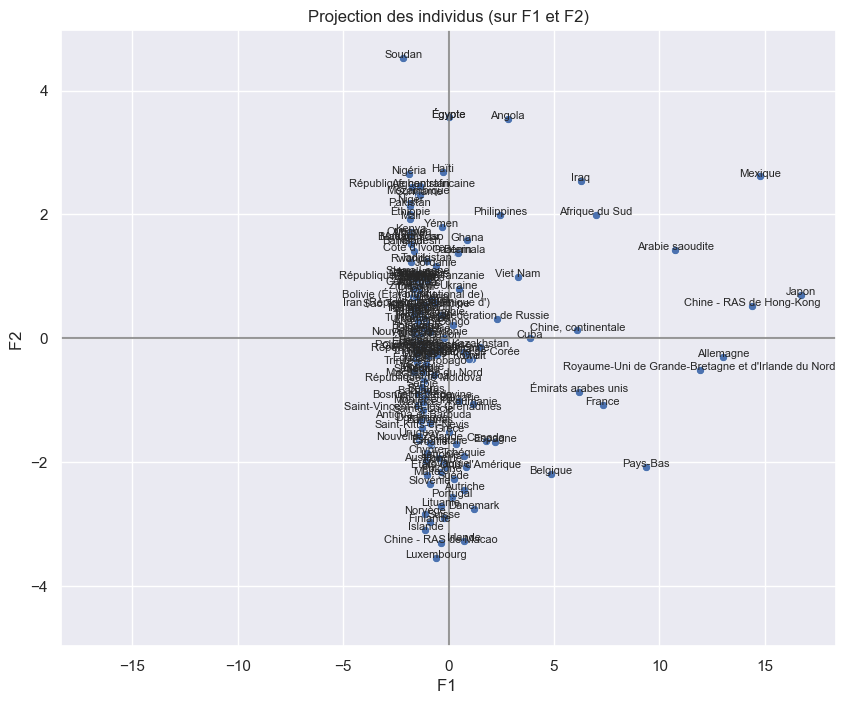

In [75]:
# Visualisation sur F1 et F2

x_y = (0,1)
display_factorial_planes (X_proj,x_y, labels=names)

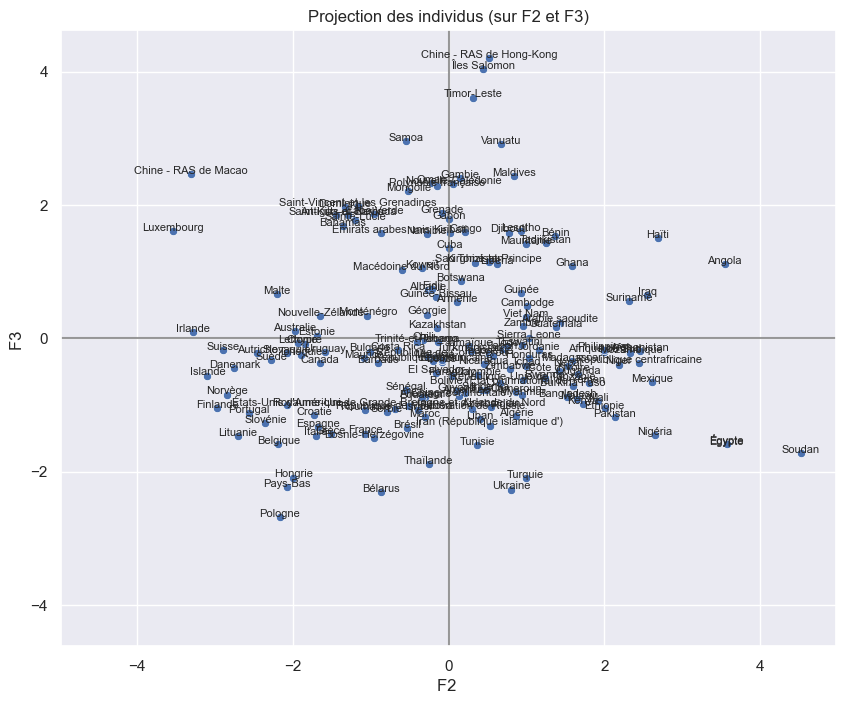

In [76]:
# Sur F2 et F3 

x_y = (1,2)
display_factorial_planes (X_proj,x_y, labels = names)

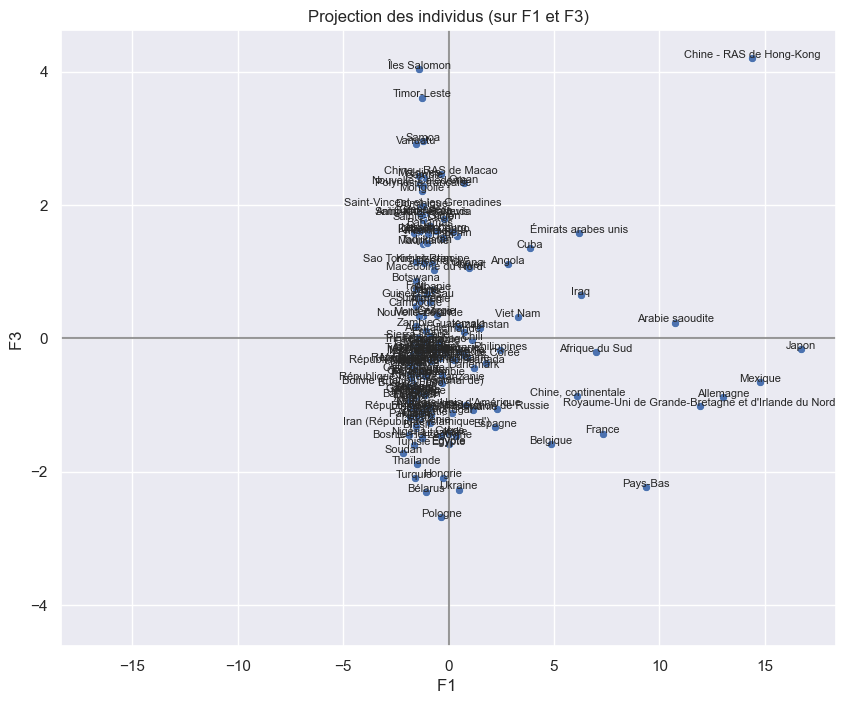

In [77]:
# Visualisation sur F1 et F3

x_y = (0,2)
display_factorial_planes (X_proj,x_y, labels = names)

C:\Users\leacr\AppData\Local\Temp\ipykernel_10376\2313382525.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


Text(0.5, 0, 'F3')

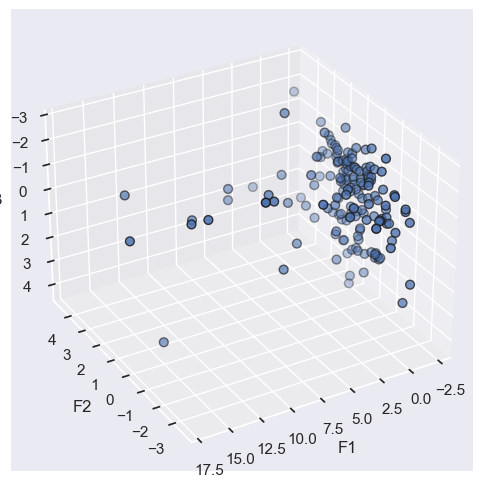

In [78]:
# Avec les 3 dimensions 

fig= plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=120)

ax.scatter(
    X_proj.iloc[:, 0],
    X_proj.iloc[:, 1],
    X_proj.iloc[:, 2],
    cmap="Set1", edgecolor="k", s=40)

ax.set_xlabel("F1")
ax.set_ylabel("F2")
ax.set_zlabel("F3")


<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">3.3 - Graphique des corrélations </h3>

In [79]:
# fonction pour construire le graph 

def correlation_graph(pca, 
                      x_y, 
                      features) :

    
    x,y=x_y    
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

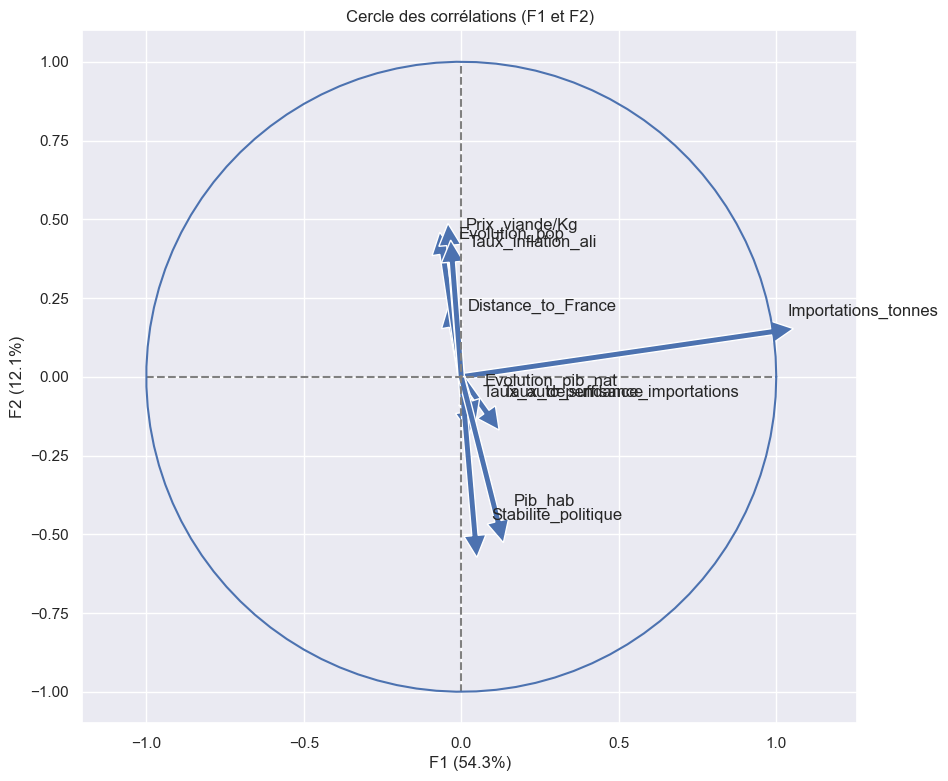

In [80]:
# Utiliser la fonction pour F1 et F2

x_y = (0,1)
x_y
correlation_graph(pca, x_y, features)

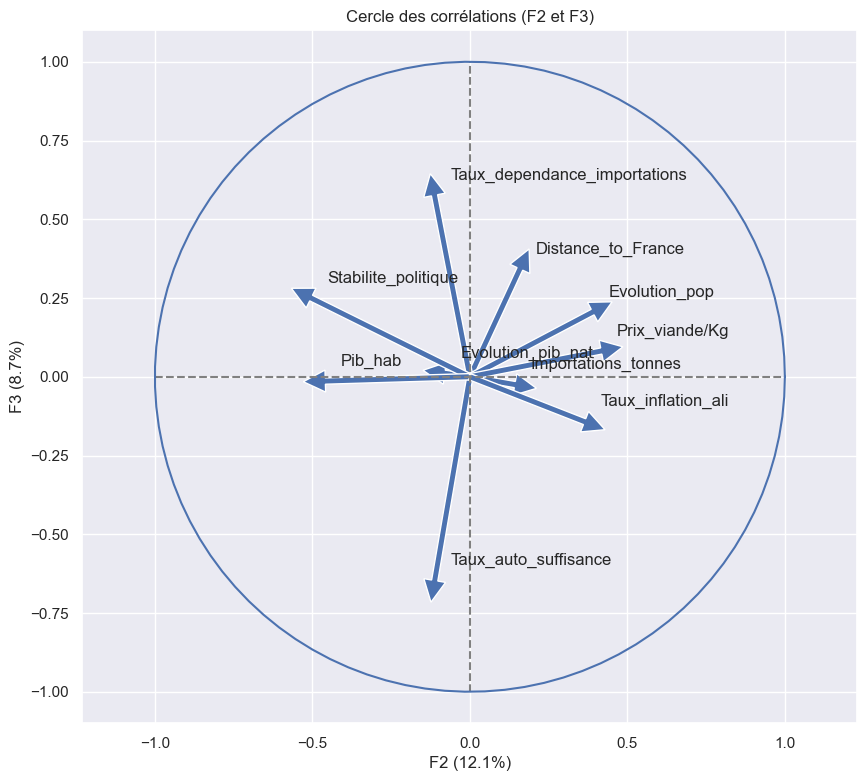

In [81]:
# Utiliser la fonction pour F2 et F3

x_y = (1,2)
x_y
correlation_graph(pca, x_y, features)

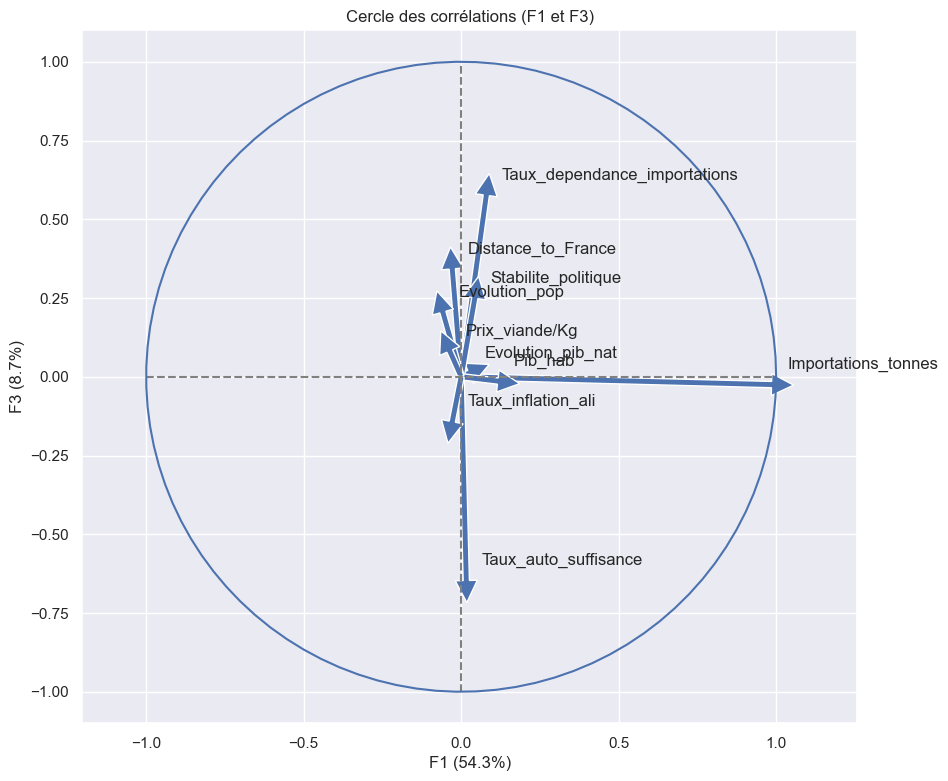

In [82]:
# Utiliser la fonction pour F1 et F3

x_y = (0,2)
correlation_graph(pca, x_y, features)

<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">3.4 - Projection avec les clusters K-means  </h3>

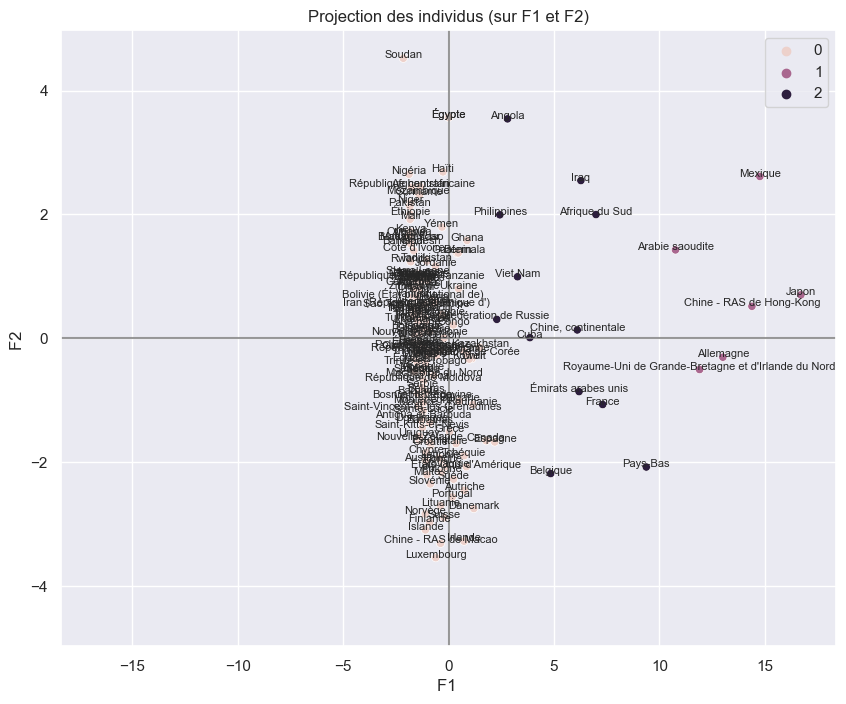

In [83]:
# Visualisation sur F1 et F2

x_y = (0,1)
display_factorial_planes (X_proj,x_y, labels=names, clusters=kmeans.labels_)

In [84]:
# Visualisation sur F2 et F3

x_y = (1,2)
display_factorial_planes (X_proj,x_y, labels=names, clusters=kmeans.labels_)

In [85]:
# Visualisation sur F1 et F3

x_y = (0,2)
display_factorial_planes (X_proj,x_y, labels=names, clusters=kmeans.labels_)

Text(0.5, 0.92, 'Projection des pays sur les 3 dimensions')

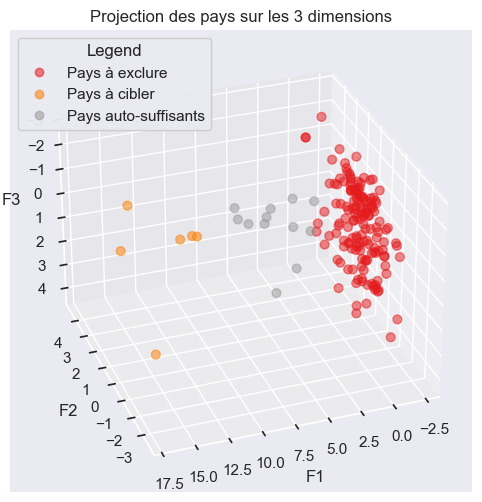

In [95]:
# Avec les 3 + clusters :

labels = kmeans.labels_
fig= plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

# On affiche nos points : 
scatter = ax.scatter(
    X_proj.iloc[:, 0],
    X_proj.iloc[:, 1],
    X_proj.iloc[:, 2],
    c=labels, cmap="Set1", s=40, alpha =0.5)

# On paramètre la légende :
legend = ax.legend(*[scatter.legend_elements()[0],['Pays à exclure','Pays à cibler','Pays auto-suffisants']], 
                    title="Legend", loc='upper left')

# On spécifie le nom des axes : 
ax.set_xlabel("F1")
ax.set_ylabel("F2")
ax.set_zlabel("F3")

ax.add_artist(legend)
plt.title('Projection des pays sur les 3 dimensions')

In [94]:
# Avec les 3 + clusters :

labels = kmeans.labels_
fig= plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=160)

# On affiche nos points : 
scatter = ax.scatter(
    X_proj.iloc[:, 0],
    X_proj.iloc[:, 1],
    X_proj.iloc[:, 2],
    c=labels, cmap="Set1", s=40, alpha =0.5)

# On paramètre la légende :
legend = ax.legend(*[scatter.legend_elements()[0],['Pays à exclure','Pays à cibler','Pays auto-suffisants']], 
                    title="Legend", loc='upper left')

# On spécifie le nom des axes : 
ax.set_xlabel("F1")
ax.set_ylabel("F2")
ax.set_zlabel("F3")

ax.add_artist(legend)
plt.title('Projection des pays sur les 3 dimensions')

Text(0.5, 0.92, 'Projection des pays sur les 3 dimensions')

<div style="border: 1px solid RGB(173,40,59);" >
<h3 style="margin: auto; padding: 20px; color: RGB(173,40,59); ">3.5 - Projection avec les clusters de l'ACH </h3>

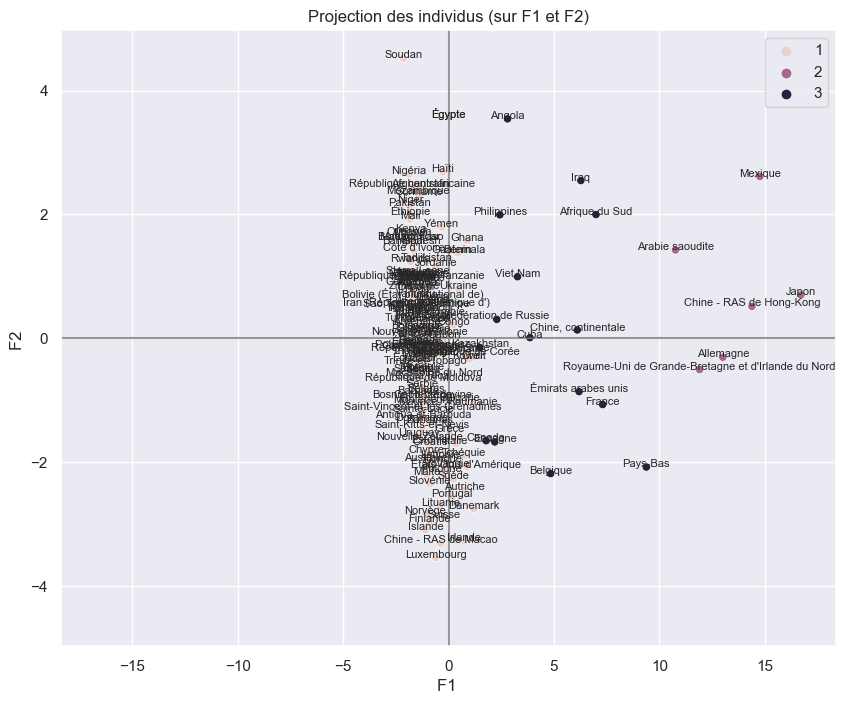

In [88]:
# Visualisation sur F1 et F2

x_y = (0,1)
display_factorial_planes (X_proj,x_y, labels=names, clusters=clusters)

In [89]:
# Visualisation sur F2 et F3

x_y = (1,2)
display_factorial_planes (X_proj,x_y, labels=names, clusters=clusters)

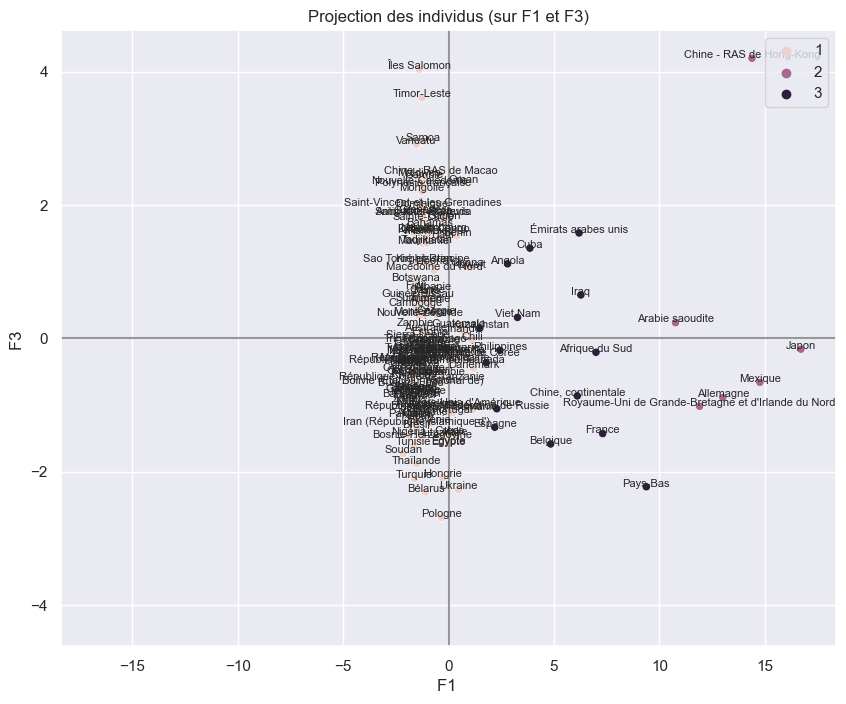

In [90]:
# Visualisation sur F1 et F3

x_y = (0,2)
display_factorial_planes (X_proj,x_y, labels=names, clusters=clusters)

Text(0.5, 0.92, 'Projection des pays sur les 3 dimensions')

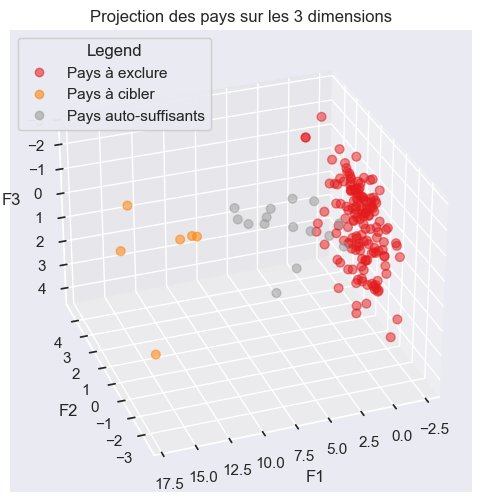

In [91]:
# Avec les 3 + clusters :

labels = clusters
fig= plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

# On affiche nos points : 
scatter = ax.scatter(
    X_proj.iloc[:, 0],
    X_proj.iloc[:, 1],
    X_proj.iloc[:, 2],
    c=labels, cmap="Set1", s=40, alpha =0.5)

# On paramètre la légende :
legend = ax.legend(*[scatter.legend_elements()[0],['Pays à exclure','Pays à cibler','Pays auto-suffisants']], 
                    title="Legend", loc='upper left')

# On spécifie le nom des axes : 
ax.set_xlabel("F1")
ax.set_ylabel("F2")
ax.set_zlabel("F3")

ax.add_artist(legend)
plt.title('Projection des pays sur les 3 dimensions')

In [92]:
# Avec les 3 + clusters :

labels = clusters
fig= plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=150)

# On affiche nos points : 
scatter = ax.scatter(
    X_proj.iloc[:, 0],
    X_proj.iloc[:, 1],
    X_proj.iloc[:, 2],
    c=labels, cmap="Set1", s=40, alpha =0.5)

# On paramètre la légende :
legend = ax.legend(*[scatter.legend_elements()[0],['Pays à exclure','Pays à cibler','Pays auto-suffisants']], 
                    title="Legend", loc='upper left')

# On spécifie le nom des axes : 
ax.set_xlabel("F1")
ax.set_ylabel("F2")
ax.set_zlabel("F3")

ax.add_artist(legend)
plt.title('Projection des pays sur les 3 dimensions')

Text(0.5, 0.92, 'Projection des pays sur les 3 dimensions')